In [1]:
from bokeh.plotting import figure, output_notebook, show

In [2]:
# import libraries
from datetime import datetime, timedelta
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
cust = pd.read_excel('C:\\Users\\Shariq\\DATAS\\Capstone\\Customer_Data.xlsx')
plant = pd.read_excel('C:\\Users\\Shariq\\DATAS\\Capstone\\Plant Master.xlsx')
jtd = pd.read_csv('C:\\Users\\Shariq\\DATAS\\Capstone\\JTD.csv')
fi = pd.read_csv('C:\\Users\\Shariq\\DATAS\\Capstone\\Final_invoice.csv')

C:\Users\Azhar\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (9,10,14,15,21,41,51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
pd.set_option('display.max_columns', None)

In [5]:
fi.head()

,Unnamed: 0,Amt Rcvd From Custom,Amt Rcvd From Ins Co,Area / Locality,CGST(14%),CGST(2.5%),CGST(6%),CGST(9%),CITY,Cash /Cashless Type,Claim No.,Cust Type,Customer No.,District,Expiry Date,Gate Pass Date,Gate Pass Time,IGST(12%),IGST(18%),IGST(28%),IGST(5%),Insurance Company,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,ODN No.,OSL Total,Order Type,Outstanding Amt,Parts Total,Pin code,Plant,Plant Name1,Policy no.,Print Status,Recovrbl Exp,Regn No,SGST/UGST(14%),SGST/UGST(2.5%),SGST/UGST(6%),SGST/UGST(9%),Service Advisor Name,TDS amount,Technician Name,Total Amt Wtd Tax.,Total CGST,Total GST,Total IGST,Total SGST/UGST,Total Value,User ID
0,0,0.0,0.0,MAJIWADA,0.0,0.0,0.0,0.0,Thane,NaN,NaN,Retail,67849,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-02,7005200002,11:30:36,168303,2014-12-13,14:29:43,49317,1203.14,GENERAL MOTORS,0.00,SPARK,7.005200e+09,500.06,Paid Service,0.0,2348.75,400601,BC01,THANE,NaN,NO,0.0,KA19MA1291,0.0,0.0,0.0,0.0,NaN,0.0,RUPESH,4051.95,0.0,0.0,0.0,0.0,4051.95,BC01FS1
1,1,0.0,0.0,THNAE,0.0,0.0,0.0,0.0,THNAE,NaN,NaN,Retail,84419,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-03,7005200003,10:07:32,173997,2015-01-02,14:12:18,78584,804.26,TATA MOTORS,197.03,INDICA,7.005200e+09,0.00,SMC Value Package,0.0,0.00,400603,BC01,THANE,NaN,NO,0.0,MH43R3046,0.0,0.0,0.0,0.0,NaN,0.0,PRASHANT,1001.29,0.0,0.0,0.0,0.0,1001.29,BC01SA2
2,2,0.0,0.0,THANE,0.0,0.0,0.0,0.0,THANE[W],NaN,NaN,Retail,81055,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-03,7005200004,11:12:57,173889,2015-01-02,11:40:44,33985,180.19,MARUTI SUZUKI,0.00,ZEN,7.005200e+09,0.00,Running Repairs,0.0,52.95,400607,BC01,THANE,NaN,NO,0.0,AP09AX0582,0.0,0.0,0.0,0.0,NaN,0.0,IMRAN,233.14,0.0,0.0,0.0,0.0,233.14,BC01SA2
3,3,0.0,0.0,THNAE,0.0,0.0,0.0,0.0,THNAE,NaN,NaN,Retail,84419,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-03,7005200005,11:40:44,174158,2015-01-03,10:12:32,78584,0.00,TATA MOTORS,0.00,INDICA,7.005200e+09,0.00,SMC Redemption,0.0,0.00,400603,BC01,THANE,NaN,NO,0.0,MH43R3046,0.0,0.0,0.0,0.0,NaN,0.0,PRASHANT,0.00,0.0,0.0,0.0,0.0,0.00,BC01SA2
4,4,0.0,0.0,THANE,0.0,0.0,0.0,0.0,THANE,NaN,NaN,Retail,18980,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-03,7005200006,12:07:17,173860,2015-01-02,10:45:42,50057,1202.97,HYUNDAI,100.00,SANTRO XING,7.005200e+09,499.99,Paid Service,0.0,944.16,400603,BC01,THANE,NaN,NO,0.0,MH04CD9768,0.0,0.0,0.0,0.0,NaN,0.0,DAYANAND,2747.12,0.0,0.0,0.0,0.0,2747.12,BC01SA2


In [6]:
fi["Area / Locality"]= fi["Area / Locality"].str.replace("THNAE", "THANE", case = False) 
fi["CITY"]= fi["CITY"].str.replace("THNAE", "THANE", case = False)

In [7]:
fi['CITY'] = fi['CITY'].str.upper()

In [8]:
fi.drop(columns=['Amt Rcvd From Custom','Amt Rcvd From Ins Co','CGST(14%)','CGST(2.5%)','CGST(6%)','CGST(9%)','IGST(12%)','IGST(18%)','IGST(28%)','IGST(5%)','Outstanding Amt','SGST/UGST(14%)','SGST/UGST(2.5%)','SGST/UGST(6%)','SGST/UGST(9%)','Service Advisor Name','TDS amount','Total CGST','Total GST','Total IGST','Total SGST/UGST'],inplace=True)

In [9]:
# Inventory item category used and the total value of each

In [10]:
jtd['Item Category'].value_counts()

P002    3250293
P001    1845451
P011     343288
P010     128823
G2TX      51629
Name: Item Category, dtype: int64

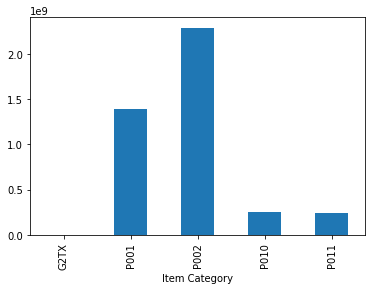

In [11]:
jtd.groupby('Item Category')['Net value'].sum().plot(kind = 'bar')

In [12]:
jtdfi = pd.merge(jtd, fi, left_on='DBM Order', right_on='Job Card No').drop('Job Card No', axis=1)

In [13]:
# Item Category required for different car makes

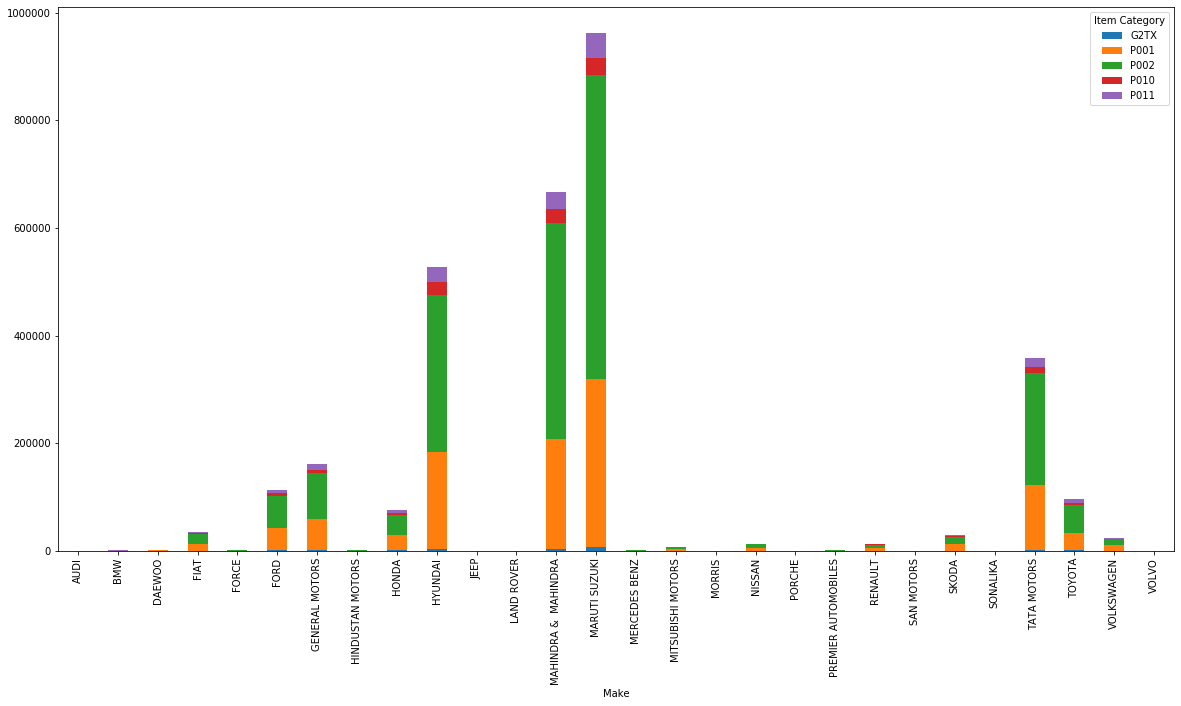

In [14]:
mic=jtdfi.groupby(['Make','Item Category']).size().unstack()
mic.plot(kind='bar',stacked=True,figsize=(20,10))

In [15]:
# Avg repair cost of different car make


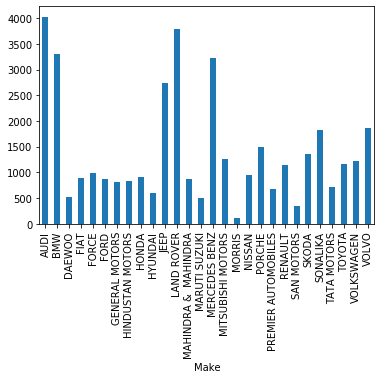

In [16]:
jtdfi.groupby('Make')['Net value'].mean().plot(kind = 'bar')

In [17]:
# finding the popular make among states

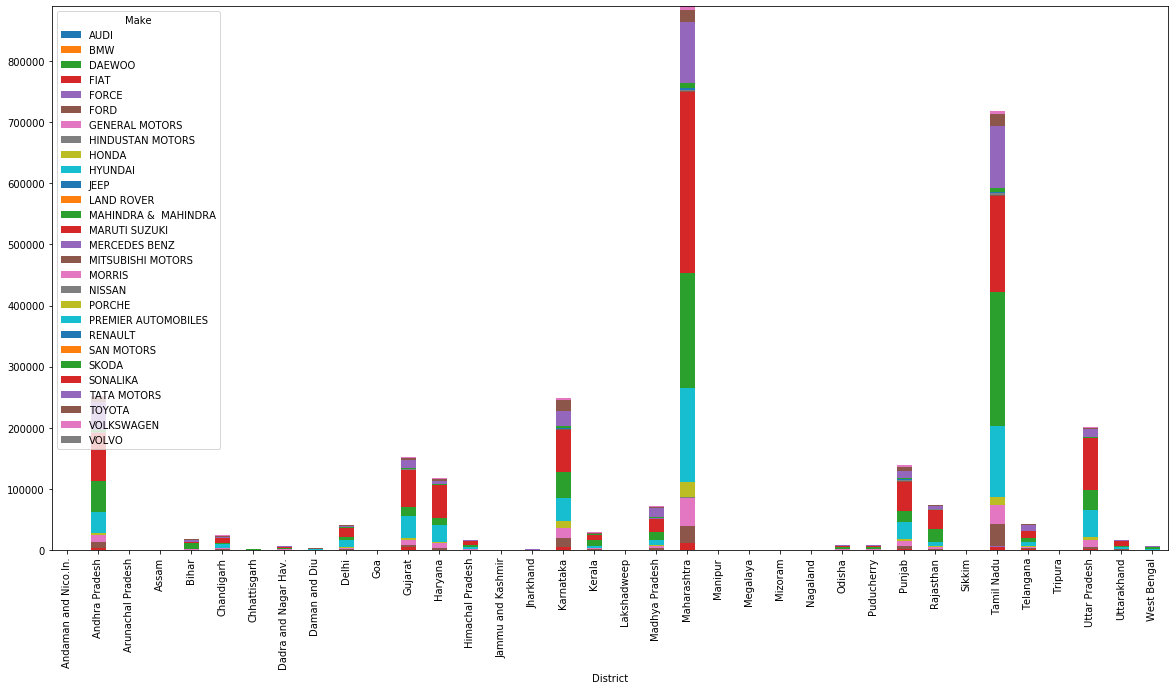

In [18]:
md=jtdfi.groupby(['District','Make']).size().unstack()
md.plot(kind='bar',stacked=True,figsize=(20,10))

In [19]:
# statewise requirement of item categories

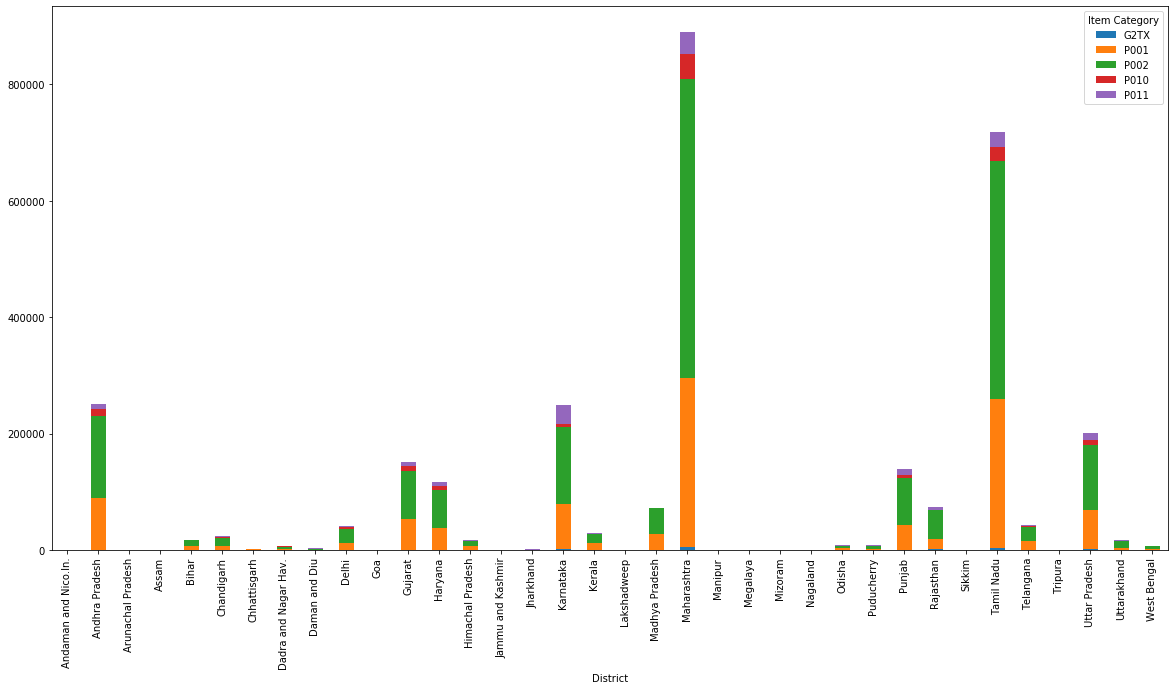

In [20]:
dic=jtdfi.groupby(['District','Item Category']).size().unstack()
dic.plot(kind='bar',stacked=True,figsize=(20,10))

In [21]:
fi[['JobCard Date','Invoice Date']] = fi[['JobCard Date','Invoice Date']].apply(pd.to_datetime)
fi['Days'] = (fi['Invoice Date'] - fi['JobCard Date']).dt.days

In [22]:
jtdfi[['JobCard Date','Invoice Date']] = jtdfi[['JobCard Date','Invoice Date']].apply(pd.to_datetime)
jtdfi['Days'] = (jtdfi['Invoice Date'] - jtdfi['JobCard Date']).dt.days

In [23]:
# throughput days for item categories


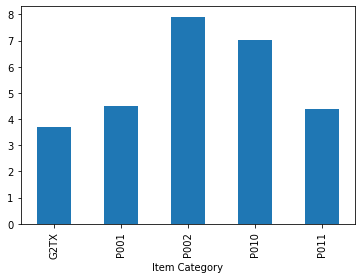

In [24]:
jtdfi.groupby('Item Category')['Days'].mean().plot(kind = 'bar')

In [25]:
# avg throughput days for different cars


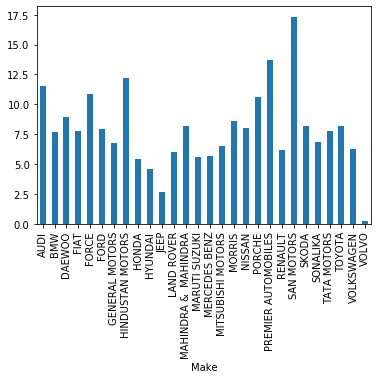

In [26]:
jtdfi.groupby('Make')['Days'].mean().plot(kind = 'bar')

In [27]:
# Target quantity of item category

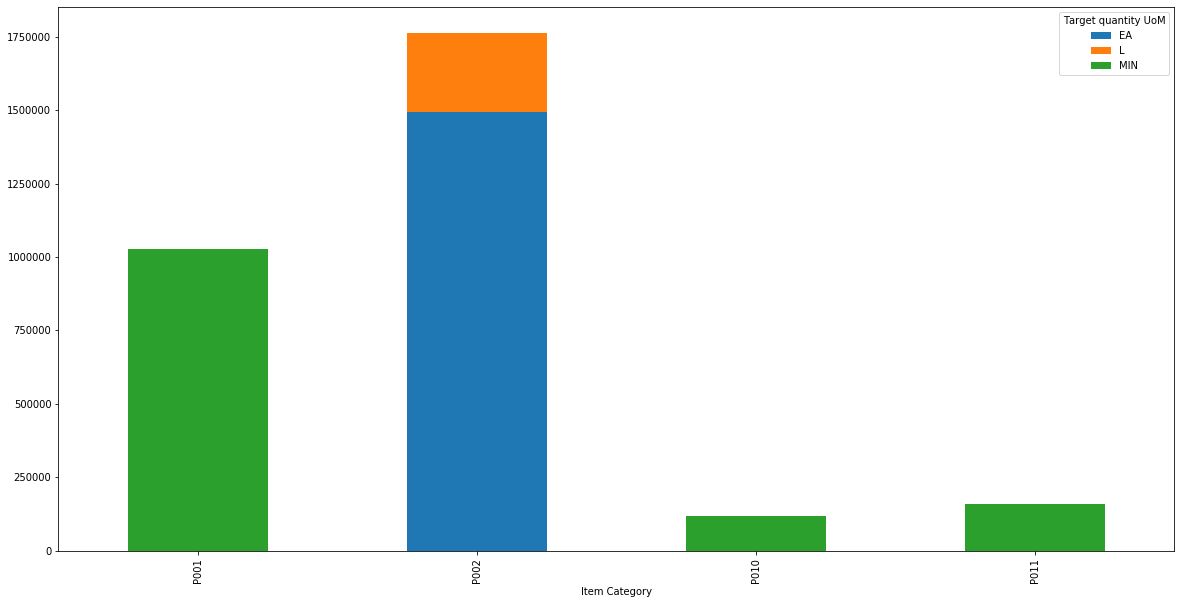

In [28]:
ictq=jtdfi.groupby(['Item Category','Target quantity UoM']).size().unstack()
ictq.plot(kind='bar',stacked=True,figsize=(20,10))

In [29]:
# Throughput days for target quantity of inventory

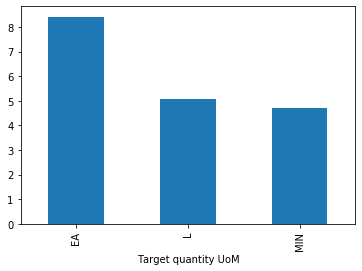

In [30]:
jtdfi.groupby('Target quantity UoM')['Days'].mean().plot(kind = 'bar')

In [31]:
# throughput days for different states


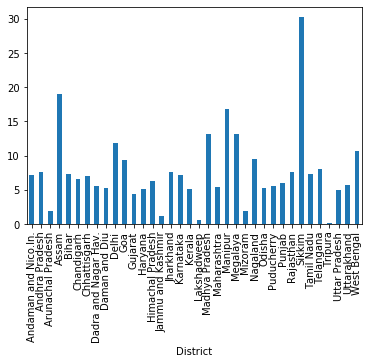

In [32]:
jtdfi.groupby('District')['Days'].mean().plot(kind = 'bar')

In [33]:
# net value of inventory vs throughput days

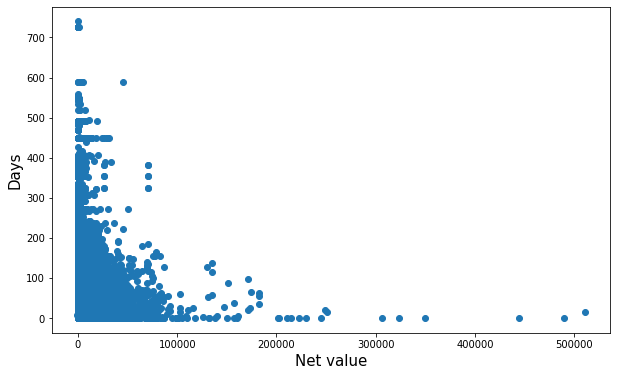

In [34]:
fig = plt.figure(figsize=(10,6))
plt.scatter(x = jtdfi['Net value'],y = jtdfi['Days'])
plt.xlabel('Net value',size=15)
plt.ylabel('Days',size=15)
plt.show()

In [35]:
dd = pd.DataFrame({'Date': pd.to_datetime(jtdfi['JobCard Date'])})
L = ['year', 'month', 'day']
date_gen = (getattr(dd['Date'].dt, i).rename(i) for i in L)
jtdfi = jtdfi.join(pd.concat(date_gen, axis=1))

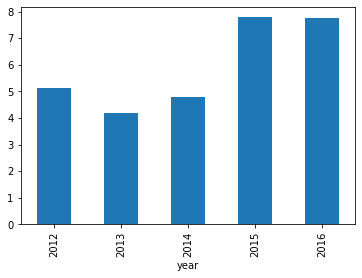

In [36]:
jtdfi.groupby('year')['Days'].mean().plot(kind = 'bar')

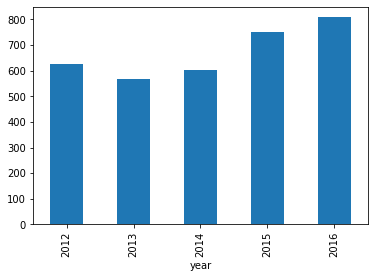

In [37]:
jtdfi.groupby('year')['Net value'].mean().plot(kind = 'bar')

In [38]:
# yearly requirement of item categories

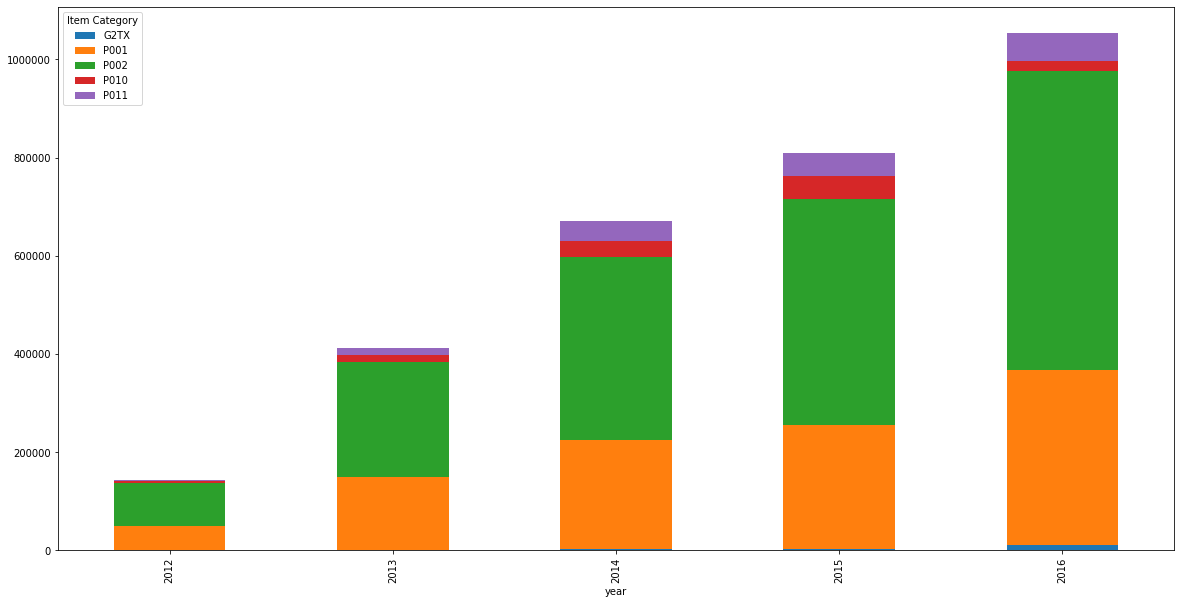

In [39]:
yic=jtdfi.groupby(['year','Item Category']).size().unstack()
yic.plot(kind='bar',stacked=True,figsize=(20,10))

In [40]:
# monthly requirement of item categories


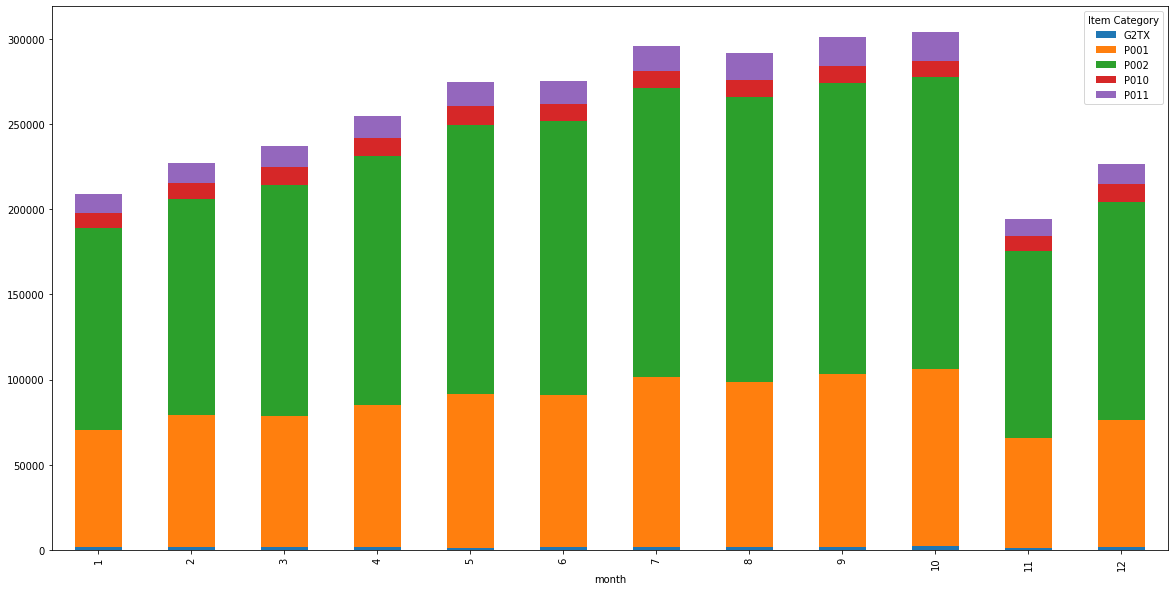

In [41]:
mnic=jtdfi.groupby(['month','Item Category']).size().unstack()
mnic.plot(kind='bar',stacked=True,figsize=(20,10))

In [42]:
# yearly count of car makes


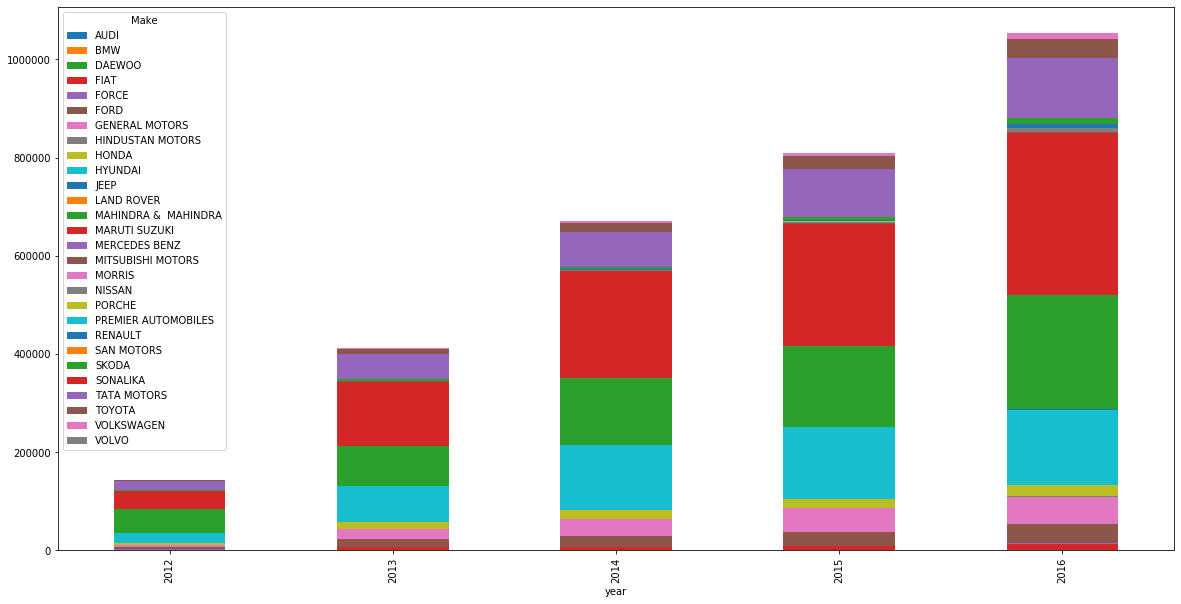

In [43]:
my=jtdfi.groupby(['year','Make']).size().unstack()
my.plot(kind='bar',stacked=True,figsize=(20,10))

In [44]:
fi['Plant Name1'].value_counts()[:10]

NASHIK                    28615
THANE                     14483
MADEENAGUDA               13323
NAGPUR                    13253
GUINDY                    12752
NERKUNDRAM                11815
MOHAN NAGAR - GAZIABAD    10259
VAPI                      10146
SURAT UDHANA               9990
FARIDABAD 1                9521
Name: Plant Name1, dtype: int64

In [45]:
import datetime

In [46]:
fi[['JobCard Date','Invoice Date']] = fi[['JobCard Date','Invoice Date']].apply(pd.to_datetime)
fi['Days'] = (fi['Invoice Date'] - fi['JobCard Date']).dt.days

In [47]:
fi['Days'].value_counts()[:20]

0     252501
1      78986
2      40634
3      24416
4      16427
5      11875
6       8699
7       7921
8       5743
9       4905
10      3891
11      3246
12      2888
13      2378
14      2369
15      1881
16      1714
17      1605
18      1422
19      1265
Name: Days, dtype: int64

In [48]:
fi['Technician Name'].value_counts()[:20]

rajesh       2133
RAJESH       1991
SAYYAD       1935
suresh       1721
MAHESH       1660
MANOJ        1650
sayyad       1536
saravanan    1483
ramesh       1400
IMRAN        1390
mahesh       1368
SARAVANAN    1326
amit         1304
murugan      1292
pankaj       1286
ARUN         1168
JK           1146
HARSHAD      1109
praveen      1102
satish       1101
Name: Technician Name, dtype: int64

In [49]:
fi['Technician Name'] = fi['Technician Name'].str.upper()

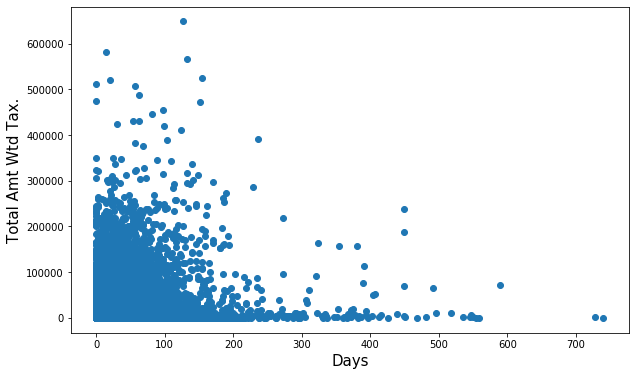

In [50]:
fig = plt.figure(figsize=(10,6))
plt.scatter(x = fi['Days'],y = fi['Total Amt Wtd Tax.'])
plt.xlabel('Days',size=15)
plt.ylabel('Total Amt Wtd Tax.',size=15)
plt.show()

In [51]:
fi.groupby('Plant Name1')['Total Amt Wtd Tax.'].sum().sort_values(ascending=False)[:20]

Plant Name1
NASHIK                     1.087682e+08
GUINDY                     1.062192e+08
NERKUNDRAM                 8.380437e+07
MADEENAGUDA                7.538786e+07
THANE                      6.160821e+07
NAGPUR                     4.669102e+07
NELLORE                    4.528969e+07
SAS NAGAR - MOHALI         4.255992e+07
VAPI                       4.192320e+07
BELLANDUR - BANGALORE      3.893095e+07
AMBATTUR - CHENNAI         3.842798e+07
FARIDABAD 1                3.661623e+07
SURAT UDHANA               3.648384e+07
MOHAN NAGAR - GAZIABAD     3.501485e+07
NOIDA - 63                 3.386482e+07
PIMPRI - PUNE              3.233238e+07
YESHWANTPUR - BANGALORE    3.163619e+07
PUNE                       3.123834e+07
X006 - A.M.MOTORS          2.955842e+07
COIMBATORE                 2.903980e+07
Name: Total Amt Wtd Tax., dtype: float64

In [52]:
fi.groupby('Plant Name1')['Days'].mean().sort_values(ascending=True)[:20]

Plant Name1
X206 - SHRI SAI SHAKTI SERVICE    0.000000
X211 -  M/S KAMAL MOTORS          0.000000
X196 -  BHATTAD AUTO SERVICES     0.172840
X316 - K & S AUTO                 0.177083
X089 - AKOLA NATIONAL GARAGE      0.245902
X432 - HARSH AUTOMOBILES          0.272727
X135 - S P JIRAPURE MOTORS        0.306452
X269 - VENUS MOTORS SERVICES      0.315789
X320 - BARUAH AUTOMOBILE CENTR    0.326087
X458 - SAIRAM AUTOMOBILES         0.478261
X131 - LEELA AUTOMOBILE           0.491525
X403 -  S V MOTORS                0.500000
X437 - RAHUL AUTO SERVICES PVT    0.550000
X317 - DAILA MOTORS               0.714286
X341 - KUMAWAT DIESEL SERVICE     0.780488
X113 - S G AUTOMOTIVES            0.909569
X259 - ROUNAK MOTORS              0.936782
X177 - MAHAMAYA MOTORS            0.987654
X017 - HEM KIRAN DIESELS          1.027644
X444 - SAI AUTO SERVICE           1.042254
Name: Days, dtype: float64

In [53]:
fi.groupby('Plant Name1')['Days'].mean().sort_values(ascending=False)[:20]

Plant Name1
X164 - EQRA AUTO                  92.635802
X106 - TRS MOTORS                 20.251701
X073- KRITI AUTOMOBILE REPAIR     17.818942
X050 - VISHWATMAK AUTOMOBILES     15.774674
X058 - ASR AUTOMOBILES            14.792982
X241 - SHRI KRISHNA AUTOMOTIVE    14.148438
X324 -  NANDHA MOTORS             13.892562
X190 - NITHIYA MOTORS             13.432813
X187 - MOTIWALA SERVICES          13.383103
X253 - GURUPRABHA AUTOWHEELS      12.763912
X003 - Om Sri Satya Sai Automo    12.327212
X297 - WAI AUTO WORLD LLP         11.419525
X114 - A J MOTORWORKS             10.963987
X125 - SHRI WARDHMAN MOTO CORP    10.370544
X270 - MONDAL MOTORS               9.753846
X386 - VINAYAKA MOTORS             9.612813
X060 - SHIVANSH AUTOMOTIVE         9.602368
X033 - TRISTAR INDIA TRADING       9.424326
X034 - SOHAMM MOTORS               9.314261
X026 - MAHADEVI SERVICE CENTER     9.219949
Name: Days, dtype: float64

In [54]:
fi.groupby('Technician Name')['Days'].mean().sort_values(ascending=False)[:20]

Technician Name
4301640                 449.0
4301243                 449.0
4302394                 449.0
4302351                 426.0
AKIL,AMOL               416.0
PULKIT                  366.0
4302337                 225.0
4303285                 197.0
ALI/MANNU               195.0
ASIAN/AZHAR/SADAB       159.0
AZIM/WAJID              158.0
VIKREEM                 151.0
DAYA/ INRAN/SHAHBAZ     143.0
4302934                 139.0
BALU SHEJWAL            132.0
SHADHIK,SRINU,NAGARA    125.0
RAFIQU                  115.0
SAINATN                 111.0
JOTHI                   111.0
VIPIN3                  110.0
Name: Days, dtype: float64

In [55]:
jtd.Description.value_counts()[:20]

MISC_OTHER CHARGES                270563
Paid Service-Minor                201857
WASHING                           199068
Wheel Alignment                   191211
OIL FILTER                        154387
URANIA SUPREMO CI 4 15W 40        122218
MFC PROLEUM CI4/SL 15W40           92091
AIR FILTER                         80211
Wheel Balancing (5 Wheels)         79970
MISC LABOR 0.5 HOURS               62982
General Check up                   62459
Paid Service-Major                 60369
WINDSHIELD LIQUID WASHER           55352
MISC LABOR 0.25 HOURS              50143
DISTILLED WATER                    46919
Interior & Upholstery Cleaning     44864
REPLACE BRAKE PAD (BOTH SIDE)      38552
PAINTING CHARGES                   34187
MISC LABOR 1 HOUR                  33993
BALANCE WEIGHT 15GRAM              31791
Name: Description, dtype: int64

In [56]:
jtd.Description.value_counts()[:20]

MISC_OTHER CHARGES                270563
Paid Service-Minor                201857
WASHING                           199068
Wheel Alignment                   191211
OIL FILTER                        154387
URANIA SUPREMO CI 4 15W 40        122218
MFC PROLEUM CI4/SL 15W40           92091
AIR FILTER                         80211
Wheel Balancing (5 Wheels)         79970
MISC LABOR 0.5 HOURS               62982
General Check up                   62459
Paid Service-Major                 60369
WINDSHIELD LIQUID WASHER           55352
MISC LABOR 0.25 HOURS              50143
DISTILLED WATER                    46919
Interior & Upholstery Cleaning     44864
REPLACE BRAKE PAD (BOTH SIDE)      38552
PAINTING CHARGES                   34187
MISC LABOR 1 HOUR                  33993
BALANCE WEIGHT 15GRAM              31791
Name: Description, dtype: int64

In [57]:
jtd['Target quantity UoM'].value_counts()

EA     2745660
MIN    2317562
L       504597
GRO         36
Name: Target quantity UoM, dtype: int64

In [58]:
len(fi['Job Card No'].unique()), len(jtd['DBM Order'].unique())

(489329, 973473)

In [59]:
jtdfi.groupby('Plant Name1')['Material'].value_counts()

Plant Name1              Material        
AMBATTUR - CHENNAI       MAHINDRA_SRV        2535
                         FFSOIL200901        1988
                         HYUNDAI_SRV         1867
                         MARUTISUZUKI_SRV    1781
                         MISC_SRV07          1648
                                             ... 
YESHWANTPUR - BANGALORE  TOQA_MENU13            1
                         VWJE_VAS8              1
                         VWVN_MENU13            1
                         VWVN_MENU2             1
                         VWVN_MENU4             1
Name: Material, Length: 471033, dtype: int64

In [60]:
#converting the type of Invoice Date Field from string to datetime.
fi['Invoice Date'] = pd.to_datetime(fi['Invoice Date'])

#creating YearMonth field for the ease of reporting and visualization
fi['InvoiceYearMonth'] = fi['Invoice Date'].map(lambda date: 100*date.year + date.month)

#calculate Revenue for each row and create a new dataframe with YearMonth - Revenue columns
fi_revenue = fi.groupby(['InvoiceYearMonth'])['Total Amt Wtd Tax.'].sum().reset_index()
fi_revenue

,InvoiceYearMonth,Total Amt Wtd Tax.
0,201204,8.076962e+06
1,201205,8.722167e+06
2,201206,9.597330e+06
3,201207,1.025975e+07
4,201208,8.917974e+06
5,201209,8.882054e+06
6,201210,9.888599e+06
7,201211,1.165702e+07
8,201212,1.103765e+07
9,201301,1.082533e+07


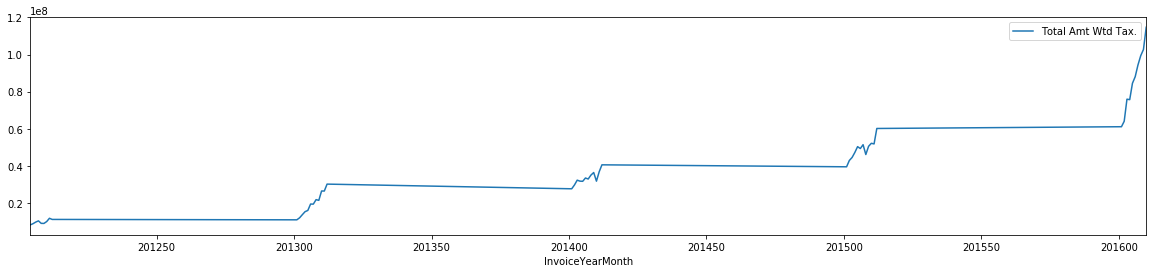

In [61]:
fi_revenue.plot(x='InvoiceYearMonth', y='Total Amt Wtd Tax.',figsize = (20,4))

In [62]:

#creating monthly active customers dataframe by counting unique Customer IDs
fi_monthly_active = fi.groupby('InvoiceYearMonth')['Customer No.'].nunique().reset_index()

#print the dataframe
fi_monthly_active


,InvoiceYearMonth,Customer No.
0,201204,1135
1,201205,1334
2,201206,1432
3,201207,1588
4,201208,1464
5,201209,1399
6,201210,1724
7,201211,2079
8,201212,2145
9,201301,2117


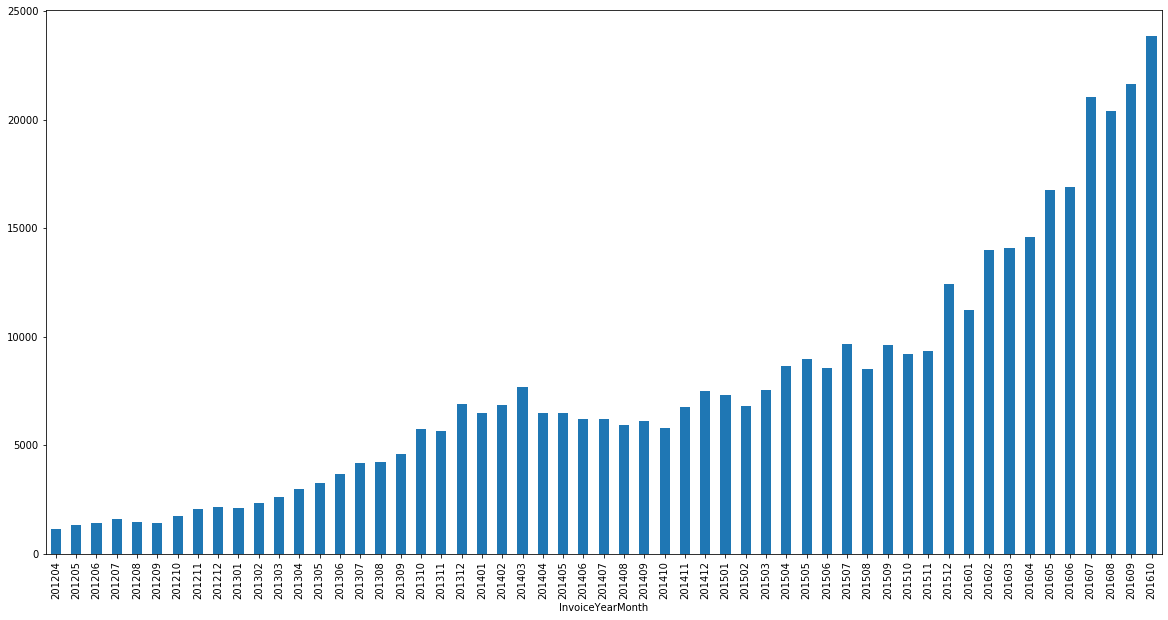

In [63]:
fig=plt.figure(figsize=(20,10))
fi_monthly_active.groupby('InvoiceYearMonth')['Customer No.'].mean().plot(kind = 'bar')

In [64]:
fi_monthly_order_avg = fi.groupby('InvoiceYearMonth')['Total Amt Wtd Tax.'].mean().reset_index()

#print the dataframe
fi_monthly_order_avg

,InvoiceYearMonth,Total Amt Wtd Tax.
0,201204,5275.612169
1,201205,4867.280664
2,201206,5075.266891
3,201207,4771.978623
4,201208,4639.944683
5,201209,4829.827999
6,201210,4474.479362
7,201211,4452.643969
8,201212,4115.456465
9,201301,4186.128074


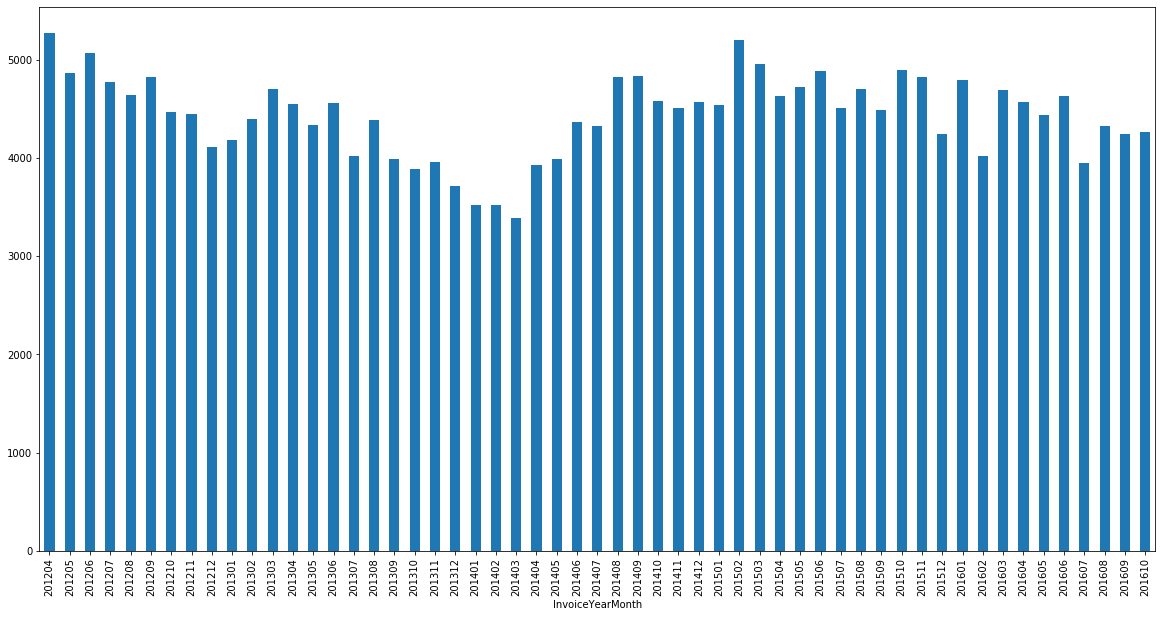

In [65]:
fig=plt.figure(figsize=(20,10))
fi_monthly_order_avg.groupby('InvoiceYearMonth')['Total Amt Wtd Tax.'].mean().plot(kind = 'bar')

In [66]:
#create a dataframe contaning CustomerID and first purchase date
fi_min_purchase = fi.groupby('Customer No.')['Invoice Date'].min().reset_index()
fi_min_purchase.columns = ['Customer No.','MinPurchaseDate']
fi_min_purchase['MinPurchaseYearMonth'] = fi_min_purchase['MinPurchaseDate'].map(lambda date: 100*date.year + date.month)

#merge first purchase date column to our main dataframe (tx_uk)
fi = pd.merge(fi, fi_min_purchase, on='Customer No.')

fi.head()

#create a column called User Type and assign Existing 
#if User's First Purchase Year Month before the selected Invoice Year Month
fi['UserType'] = 'New'
fi.loc[fi['InvoiceYearMonth']>fi['MinPurchaseYearMonth'],'UserType'] = 'Existing'

#calculate the Revenue per month for each user type
fi_user_type_revenue = fi.groupby(['InvoiceYearMonth','UserType'])['Total Amt Wtd Tax.'].sum().reset_index()

In [67]:
fi_user_type_revenue

,InvoiceYearMonth,UserType,Total Amt Wtd Tax.
0,201204,New,8.076962e+06
1,201205,Existing,2.560510e+06
2,201205,New,6.161657e+06
3,201206,Existing,2.833540e+06
4,201206,New,6.763790e+06
...,...,...,...
104,201608,New,6.178394e+07
105,201609,Existing,3.698219e+07
106,201609,New,6.571513e+07
107,201610,Existing,4.030596e+07


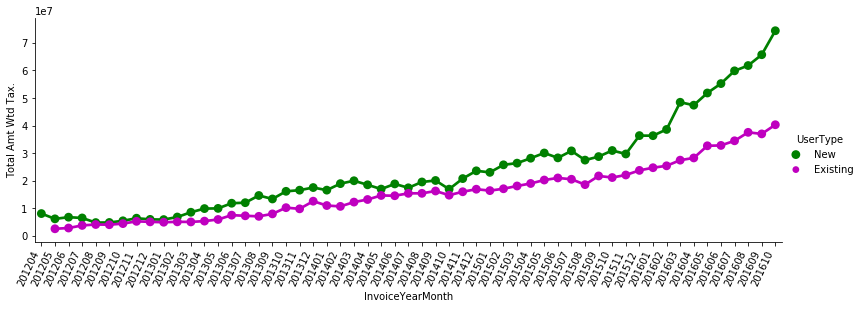

In [68]:
chart=sns.catplot(x="InvoiceYearMonth", y="Total Amt Wtd Tax.", hue="UserType",
            palette={"New": "g", "Existing": "m"},
            kind="point", data=fi_user_type_revenue,height=4,aspect=3);
chart.set_xticklabels(rotation=65, horizontalalignment='right')
chart.fig.set_figwidth(12)
chart.fig.set_figheight(4)

In [69]:
fi.UserType.value_counts()

New         286974
Existing    205340
Name: UserType, dtype: int64

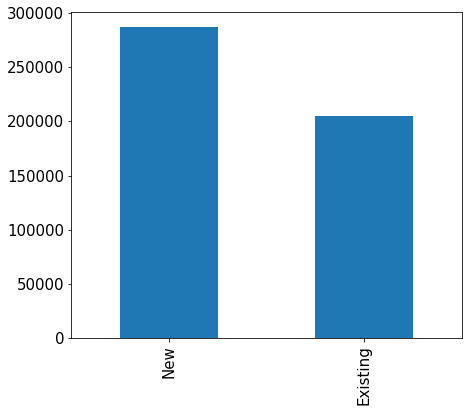

In [70]:
fi["UserType"].value_counts().plot(kind="bar", figsize=(7,6), fontsize=15)

In [71]:
fi_user_ratio = fi.query("UserType == 'New'").groupby(['InvoiceYearMonth'])['Customer No.'].nunique()/fi.query("UserType == 'Existing'").groupby(['InvoiceYearMonth'])['Customer No.'].nunique() 
fi_user_ratio = fi_user_ratio.reset_index()
fi_user_ratio = fi_user_ratio.dropna()

#print the dafaframe
fi_user_ratio

,InvoiceYearMonth,Customer No.
1,201205,7.893333
2,201206,4.593750
3,201207,3.157068
4,201208,2.056367
5,201209,1.770297
6,201210,1.732171
7,201211,1.832425
8,201212,1.529481
9,201301,1.553679
10,201302,1.537716


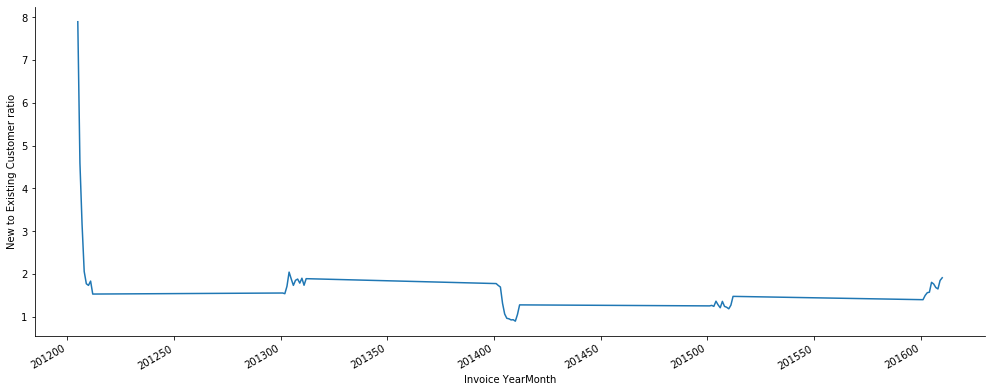

In [72]:
g = sns.relplot(x="InvoiceYearMonth", y="Customer No.", kind="line", data=fi_user_ratio,height=4,aspect=3)
g.fig.autofmt_xdate()
g.set(xlabel='Invoice YearMonth', ylabel='New to Existing Customer ratio')
g.fig.set_figwidth(14)
g.fig.set_figheight(6)

In [73]:
#identify which users are active by looking at their revenue per month
fi_user_purchase = fi.groupby(['Customer No.','InvoiceYearMonth'])['Total Amt Wtd Tax.'].sum().reset_index()

#create retention matrix with crosstab
fi_retention = pd.crosstab(fi_user_purchase['Customer No.'], fi_user_purchase['InvoiceYearMonth']).reset_index()

fi_retention.head()

#create an array of dictionary which keeps Retained & Total User count for each month
months = fi_retention.columns[2:]
retention_array = []
for i in range(len(months)-1):
    retention_data = {}
    selected_month = months[i+1]
    prev_month = months[i]
    retention_data['InvoiceYearMonth'] = int(selected_month)
    retention_data['TotalUserCount'] = fi_retention[selected_month].sum()
    retention_data['RetainedUserCount'] = fi_retention[(fi_retention[selected_month]>0) & (fi_retention[prev_month]>0)][selected_month].sum()
    retention_array.append(retention_data)
    
#convert the array to dataframe and calculate Retention Rate
fi_retention = pd.DataFrame(retention_array)
fi_retention['RetentionRate'] = fi_retention['RetainedUserCount']/fi_retention['TotalUserCount']


In [74]:
fi_retention

,InvoiceYearMonth,TotalUserCount,RetainedUserCount,RetentionRate
0,201206,1432,151,0.105447
1,201207,1588,181,0.113980
2,201208,1464,183,0.125000
3,201209,1399,158,0.112938
4,201210,1724,169,0.098028
5,201211,2079,175,0.084175
6,201212,2145,227,0.105828
7,201301,2117,234,0.110534
8,201302,2355,232,0.098514
9,201303,2589,246,0.095017


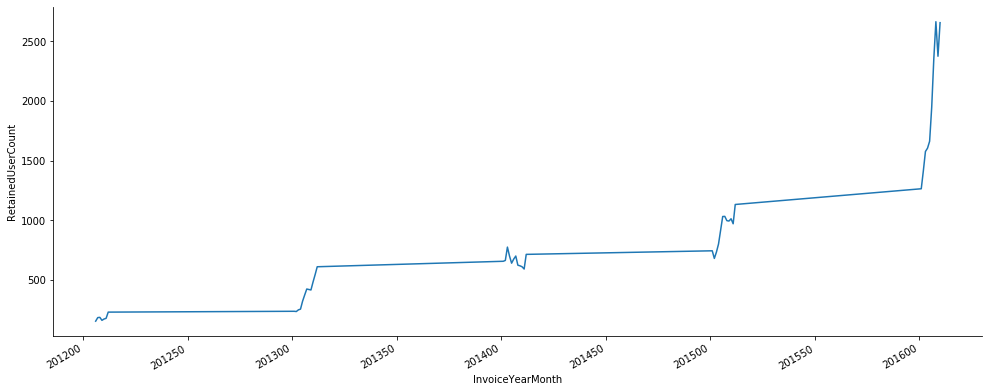

In [75]:
b = sns.relplot(x="InvoiceYearMonth", y="RetainedUserCount", kind="line", data=fi_retention,height=4,aspect=3)
b.fig.autofmt_xdate()
b.fig.set_figwidth(14)
b.fig.set_figheight(6)

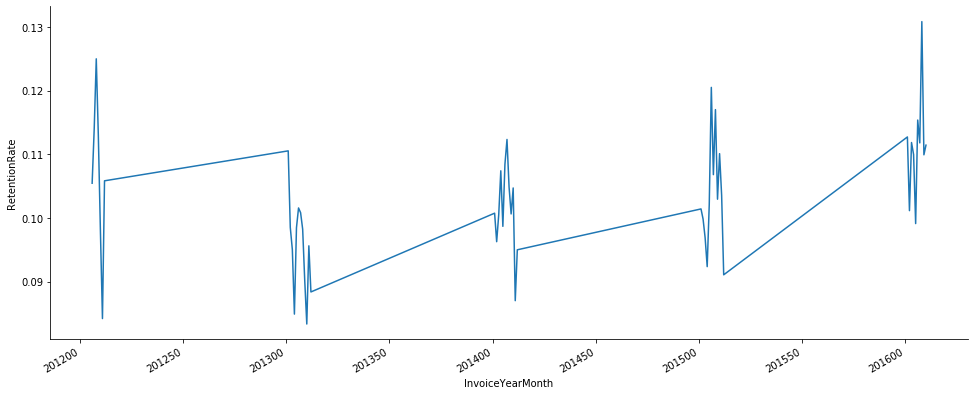

In [76]:
n = sns.relplot(x="InvoiceYearMonth", y="RetentionRate", kind="line", data=fi_retention,height=5,aspect=2)
n.fig.autofmt_xdate()
n.fig.set_figwidth(14)
n.fig.set_figheight(6)

In [77]:
fi.head()

,Unnamed: 0,Area / Locality,CITY,Cash /Cashless Type,Claim No.,Cust Type,Customer No.,District,Expiry Date,Gate Pass Date,Gate Pass Time,Insurance Company,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,ODN No.,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Policy no.,Print Status,Recovrbl Exp,Regn No,Technician Name,Total Amt Wtd Tax.,Total Value,User ID,Days,InvoiceYearMonth,MinPurchaseDate,MinPurchaseYearMonth,UserType
0,0,MAJIWADA,THANE,NaN,NaN,Retail,67849,Maharashtra,NaN,NaN,00:00:00,NaN,2015-01-02,7005200002,11:30:36,168303,2014-12-13,14:29:43,49317,1203.14,GENERAL MOTORS,0.0,SPARK,7.005200e+09,500.06,Paid Service,2348.75,400601,BC01,THANE,NaN,NO,0.0,KA19MA1291,RUPESH,4051.95,4051.95,BC01FS1,20,201501,2014-08-14,201408,Existing
1,619842,MAJIWADA,THANE,CASHLESS,MOT03977311,Retail,67849,Maharashtra,NaN,NaN,00:00:00,NaN,2014-08-14,7000137359,17:54:30,136482,2014-08-08,15:26:53,45575,989.98,GENERAL MOTORS,0.0,SPARK,7.000137e+09,6249.87,Accidental,4230.25,400601,BC01,THANE,NaN,NO,0.0,KA19MA1291,AMARNATH,11470.10,11470.10,BC01FS1,6,201408,2014-08-14,201408,New
2,619970,MAJIWADA,THANE,NaN,NaN,Retail,67849,Maharashtra,NaN,NaN,00:00:00,NaN,2014-08-16,7000137489,10:52:30,135895,2014-08-06,12:49:48,45575,6473.05,GENERAL MOTORS,0.0,SPARK,7.000137e+09,7325.09,Paid Service,14546.14,400601,BC01,THANE,NaN,NO,0.0,KA19MA1291,RUPESH,28344.28,28344.28,BC01FS1,10,201408,2014-08-14,201408,New
3,632962,MAJIWADA,THANE,NaN,NaN,Retail,67849,Maharashtra,NaN,NaN,00:00:00,NaN,2014-10-09,7000151113,17:35:30,150383,2014-10-06,11:40:52,47556,0.00,GENERAL MOTORS,0.0,SPARK,7.000151e+09,0.00,Running Repairs,200.00,400601,BC01,THANE,NaN,NO,0.0,KA19MA1291,HARSHAD,200.00,200.00,BC01SA1,3,201410,2014-08-14,201408,Existing
4,655371,MAJIWADA,THANE,CASHLESS,MOTO4249094,Retail,67849,Maharashtra,NaN,NaN,00:00:00,NaN,2014-12-31,7000175211,18:41:00,168210,2014-12-13,12:14:37,49317,1760.02,GENERAL MOTORS,500.0,SPARK,7.000175e+09,7850.09,Accidental,20348.81,400601,BC01,THANE,NaN,NO,0.0,KA19MA1291,AMARNATH,30458.92,30458.92,BC01FS1,18,201412,2014-08-14,201408,Existing


In [78]:
fi["Area / Locality"]= fi["Area / Locality"].str.replace("THNAE", "THANE", case = False) 
fi["CITY"]= fi["CITY"].str.replace("THNAE", "THANE", case = False)

In [79]:
fi['CITY'] = fi['CITY'].str.upper()

In [80]:
jtd.head()

,Unnamed: 0,DBM Order,Order Item,Material,Labor Value Number,Description,Item Category,Order Quantity,Target quantity UoM,Net value
0,0,22385,180,OSLCC_SRV31,NaN,MACHINING RR.SUSPENSION CHARGE (MAJOR),P010,1.2,MIN,1869.87
1,1,23910,10,1DM279018170117,NaN,ASSY.OIL COOLER (6-PLATE) (VOR,P002,1.0,EA,2151.13
2,2,23910,40,1IS150203BE01,NaN,FRONT WHEEL BEARING/ LUBRICATE,P002,1.0,EA,2552.92
3,3,23910,60,1DM279001990173,NaN,ASSY.CYL.HEAD W /O INJ.(NA W /O,P002,1.0,EA,20360.14
4,4,23910,70,1DM88552790S001SA,NaN,Engine Overhaul Kit -Indica Di,P002,1.0,EA,10691.63


In [81]:
fi['Order Type'].value_counts()

Running Repairs      269455
Paid Service         135004
Accidental            44159
SMC Redemption        15738
Mechanical            15100
SMC Value Package      9781
Repeat Order           3043
Workshop Damage          17
WBW Order                17
Name: Order Type, dtype: int64

In [82]:
pd.crosstab(fi['Order Type'], fi['UserType'], dropna=False)

UserType,Existing,New
Order Type,,
Accidental,15561,28598
Mechanical,6096,9004
Paid Service,50734,84270
Repeat Order,2102,941
Running Repairs,116790,152665
SMC Redemption,10407,5331
SMC Value Package,3624,6157
WBW Order,14,3
Workshop Damage,12,5


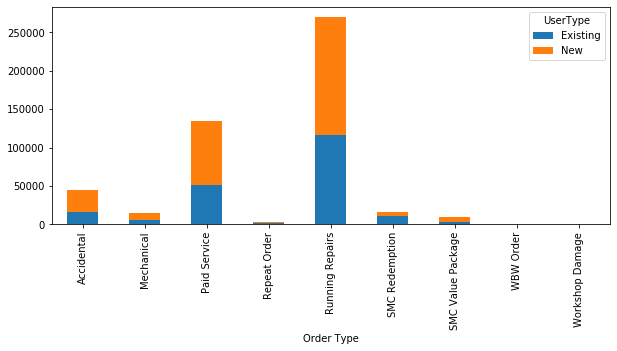

In [83]:
ou=fi.groupby(['Order Type','UserType']).size().unstack()
ou.plot(kind='bar',stacked=True,figsize=(10,4))

In [84]:
#create a dataframe contaning plant and first service date
fi_min_service = fi.groupby('Plant')['Invoice Date'].min().reset_index()
fi_min_service.columns = ['Plant','MinServiceDate']
fi_min_service['MinServiceYearMonth'] = fi_min_service['MinServiceDate'].map(lambda date: 100*date.year + date.month)

#merge first purchase date column to our main dataframe
fi = pd.merge(fi, fi_min_service, on='Plant')

fi.head()

#create a column called plant Type and assign Existing 
#if User's First Purchase Year Month before the selected Invoice Year Month
fi['PlantType'] = 'New'
fi.loc[fi['InvoiceYearMonth']>fi['MinServiceYearMonth'],'PlantType'] = 'Existing'

#calculate the Revenue per month for each user type
fi_monthly_garage = fi.groupby('InvoiceYearMonth')['Plant'].nunique().reset_index()


In [85]:
fi_monthly_garage

,InvoiceYearMonth,Plant
0,201204,8
1,201205,8
2,201206,8
3,201207,9
4,201208,9
5,201209,9
6,201210,9
7,201211,9
8,201212,10
9,201301,11


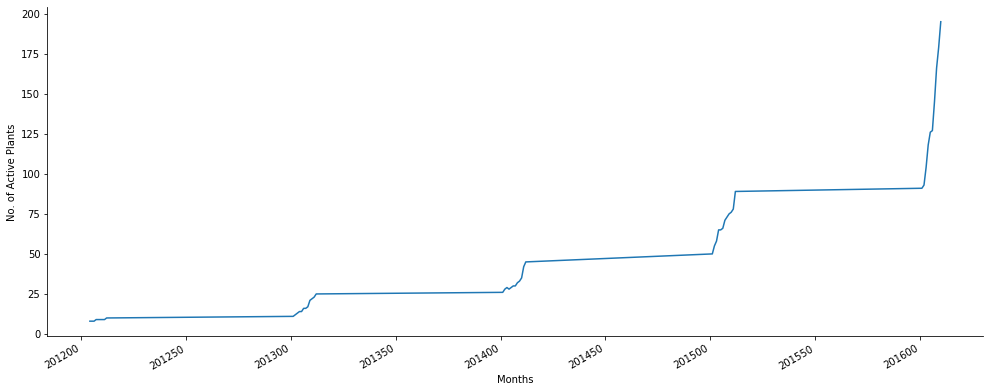

In [86]:
p = sns.relplot(x="InvoiceYearMonth", y="Plant", kind="line", data=fi_monthly_garage,height=4,aspect=3)
p.fig.autofmt_xdate()
p.set(xlabel='Months', ylabel='No. of Active Plants')
p.fig.set_figwidth(14)
p.fig.set_figheight(6)

In [87]:
fi_plant_type_revenue = fi.groupby(['InvoiceYearMonth','PlantType'])['Total Amt Wtd Tax.'].sum().reset_index()

In [88]:
fi_plant_type_revenue

,InvoiceYearMonth,PlantType,Total Amt Wtd Tax.
0,201204,New,8.076962e+06
1,201205,Existing,8.722167e+06
2,201206,Existing,9.597330e+06
3,201207,Existing,1.007090e+07
4,201207,New,1.888554e+05
...,...,...,...
95,201608,New,1.222925e+06
96,201609,Existing,1.005810e+08
97,201609,New,2.116295e+06
98,201610,Existing,1.123504e+08


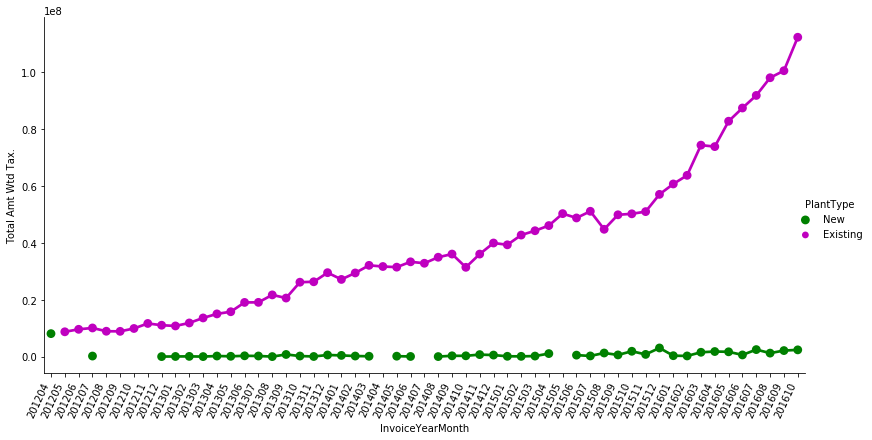

In [89]:
char=sns.catplot(x="InvoiceYearMonth", y="Total Amt Wtd Tax.", hue="PlantType",
            palette={"New": "g", "Existing": "m"},
            kind="point", data=fi_plant_type_revenue,height=5,aspect=3);
char.set_xticklabels(rotation=65, horizontalalignment='right')
char.fig.set_figwidth(12)
char.fig.set_figheight(6)

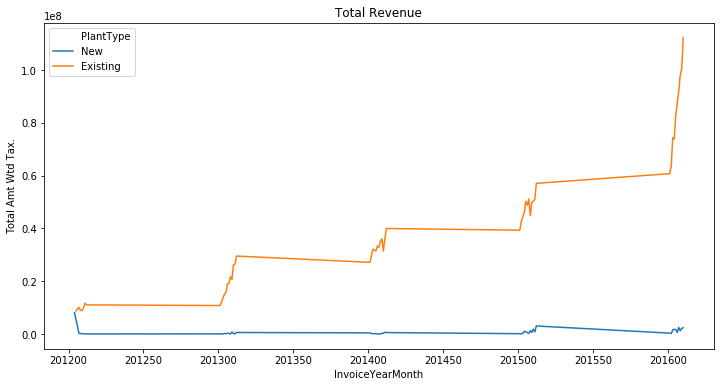

In [90]:
fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)
ya = sns.lineplot(x="InvoiceYearMonth",y="Total Amt Wtd Tax.",hue='PlantType',data=fi_plant_type_revenue,ax=ax).set_title('Total Revenue')
plt.show()

In [91]:
fi['Plant'].nunique()

242

In [92]:
fi_order_type_revenue = fi.groupby(['InvoiceYearMonth','Order Type'])['Total Amt Wtd Tax.'].sum().reset_index()

In [93]:
fi_order_type_revenue

,InvoiceYearMonth,Order Type,Total Amt Wtd Tax.
0,201204,Accidental,1.445272e+06
1,201204,Paid Service,5.314801e+06
2,201204,Running Repairs,1.316889e+06
3,201205,Accidental,1.353780e+06
4,201205,Paid Service,5.824946e+06
...,...,...,...
309,201610,Repeat Order,0.000000e+00
310,201610,Running Repairs,3.400989e+07
311,201610,SMC Redemption,0.000000e+00
312,201610,SMC Value Package,1.369676e+05


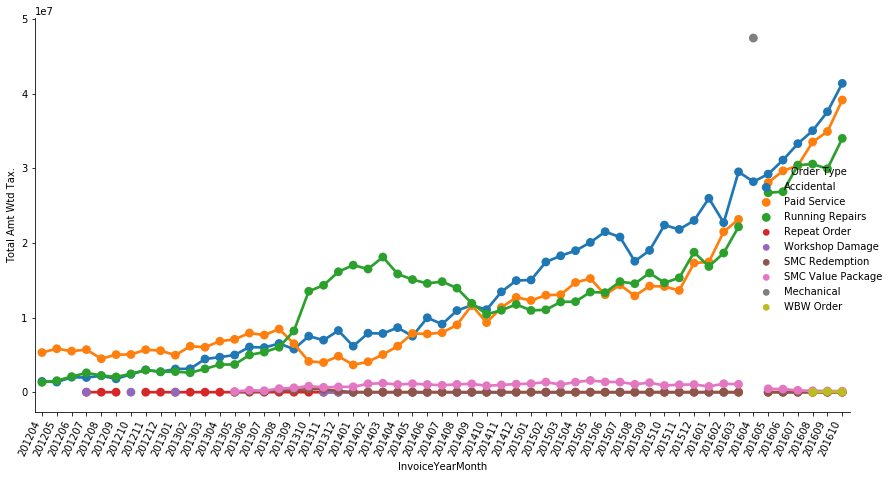

In [94]:
cha=sns.catplot(x="InvoiceYearMonth", y="Total Amt Wtd Tax.", hue="Order Type", data=fi_order_type_revenue,kind="point",height=10,aspect=5);
cha.set_xticklabels(rotation=65, horizontalalignment='right')
cha.fig.set_figwidth(12)
cha.fig.set_figheight(6)

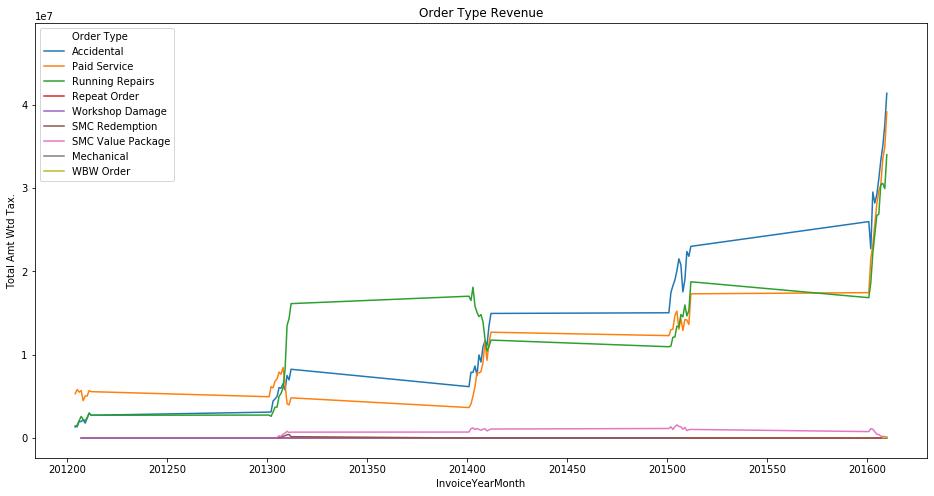

In [95]:
fig_dims = (16, 8)
fig, ax = plt.subplots(figsize=fig_dims)
ya = sns.lineplot(x="InvoiceYearMonth",y="Total Amt Wtd Tax.",hue='Order Type',data=fi_order_type_revenue,ax=ax).set_title('Order Type Revenue')
plt.show()

In [96]:
fi['Make'].nunique()

28

In [97]:
fi_make_type_revenue = fi.groupby(['InvoiceYearMonth','Make'])['Total Amt Wtd Tax.'].sum().reset_index()

In [98]:
fi_make_type_revenue

,InvoiceYearMonth,Make,Total Amt Wtd Tax.
0,201204,AUDI,315.06
1,201204,DAEWOO,299.92
2,201204,FIAT,64428.09
3,201204,FORD,351573.98
4,201204,GENERAL MOTORS,302555.53
...,...,...,...
1127,201610,SONALIKA,22183.24
1128,201610,TATA MOTORS,12061323.06
1129,201610,TOYOTA,6618004.41
1130,201610,VOLKSWAGEN,2371152.95


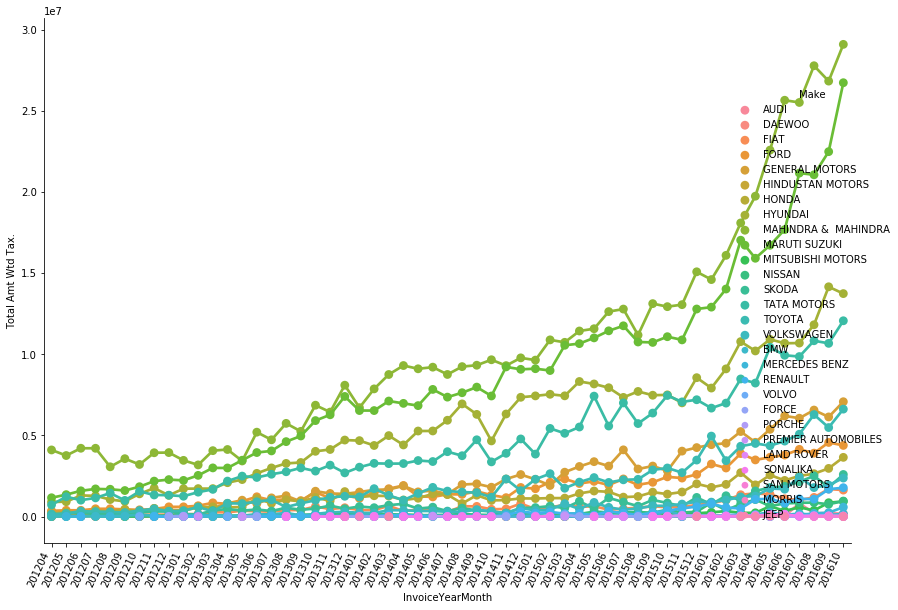

In [99]:
charr=sns.catplot(x="InvoiceYearMonth", y="Total Amt Wtd Tax.", hue="Make", data=fi_make_type_revenue,kind="point",height=10,aspect=5);
charr.set_xticklabels(rotation=65, horizontalalignment='right')
charr.fig.set_figwidth(12)
charr.fig.set_figheight(8)

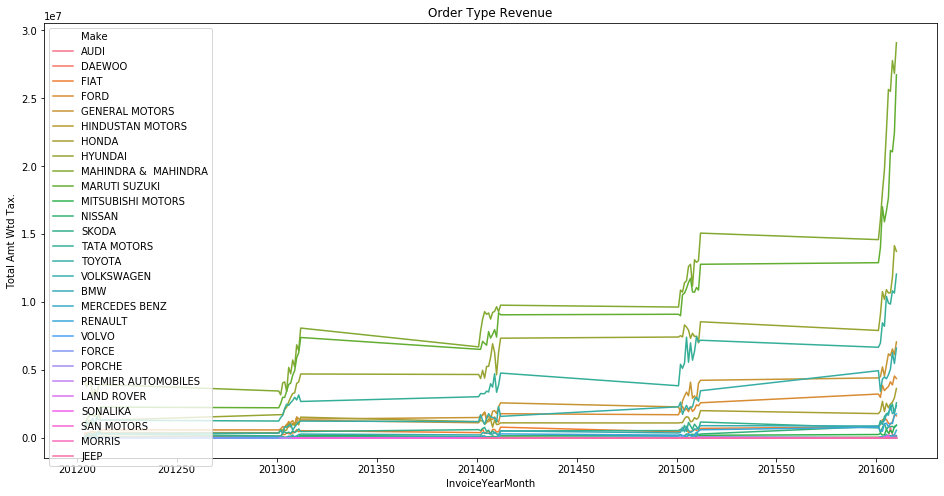

In [100]:
fig_dims = (16, 8)
fig, ax = plt.subplots(figsize=fig_dims)
ya = sns.lineplot(x="InvoiceYearMonth",y="Total Amt Wtd Tax.",hue='Make',data=fi_make_type_revenue,ax=ax).set_title('Order Type Revenue')
plt.show()

In [101]:
fi_state_type_revenue = fi.groupby(['InvoiceYearMonth','District'])['Total Amt Wtd Tax.'].sum().reset_index()

In [102]:
fi_state_type_revenue

,InvoiceYearMonth,District,Total Amt Wtd Tax.
0,201204,Andhra Pradesh,1258314.20
1,201204,Chandigarh,1519.60
2,201204,Delhi,7608.56
3,201204,Gujarat,30966.53
4,201204,Karnataka,2379.22
...,...,...,...
1025,201610,Telangana,3016510.48
1026,201610,Tripura,208.80
1027,201610,Uttar Pradesh,4873584.55
1028,201610,Uttarakhand,2410502.20


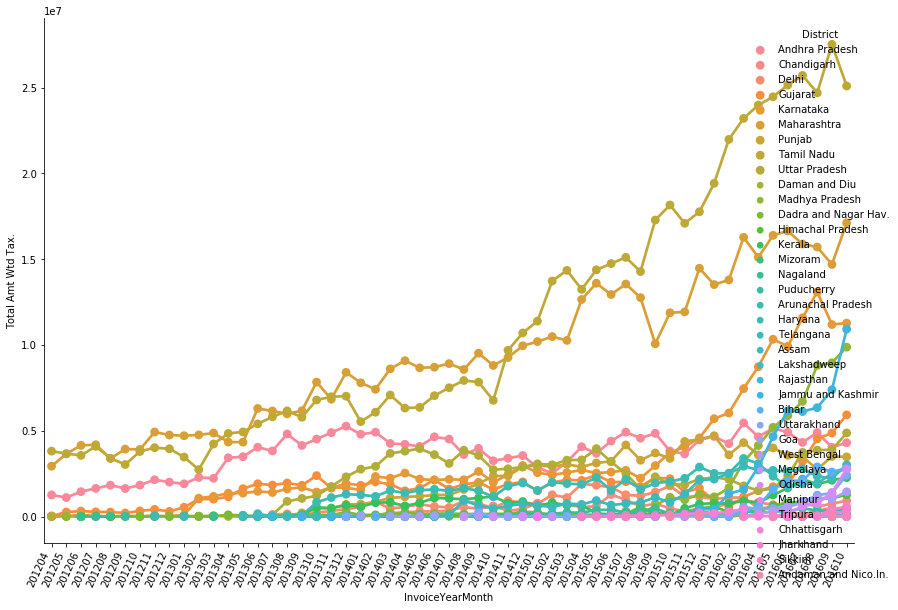

In [103]:
charrr=sns.catplot(x="InvoiceYearMonth", y="Total Amt Wtd Tax.", hue="District", data=fi_state_type_revenue,kind="point",height=10,aspect=5);
charrr.set_xticklabels(rotation=65, horizontalalignment='right')
charrr.fig.set_figwidth(12)
charrr.fig.set_figheight(8)

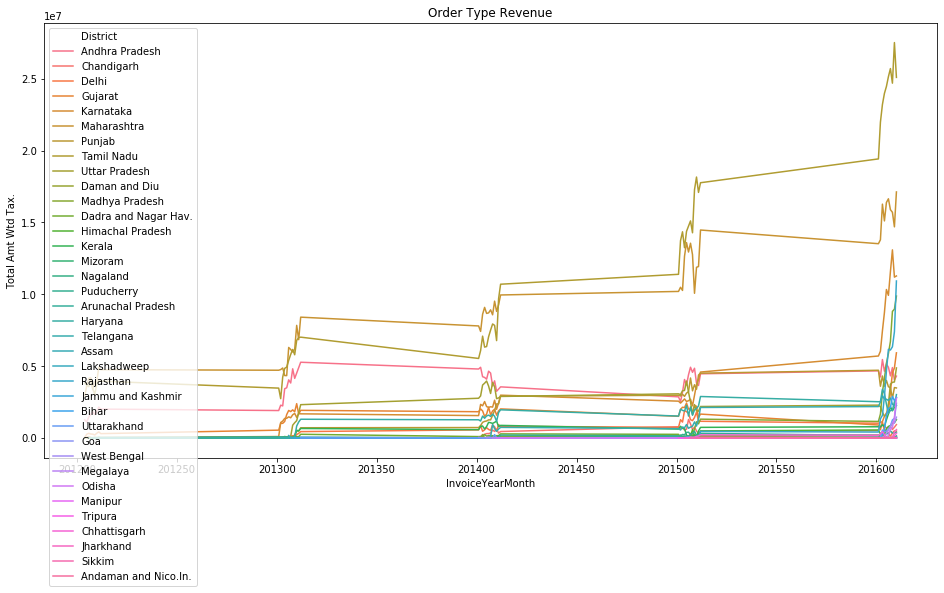

In [104]:
fig_dims = (16, 8)
fig, ax = plt.subplots(figsize=fig_dims)
ya = sns.lineplot(x="InvoiceYearMonth",y="Total Amt Wtd Tax.",hue='District',data=fi_state_type_revenue,ax=ax).set_title('Order Type Revenue')
plt.show()

In [105]:
cust.head()

,Business Partner,Customer No.,Partner Type,Data Origin,Title,Marital Status,Occupation,Date of Birth,Death date
0,31,1,1.0,Z001,NaN,NaN,NaN,NaN,NaT
1,32,2,1.0,Z005,NaN,NaN,NaN,NaN,NaT
2,34,4,1.0,Z005,NaN,2.0,NaN,NaN,NaT
3,35,5,1.0,Z005,NaN,NaN,NaN,NaN,NaT
4,42,7,1.0,Z008,NaN,NaN,NaN,NaN,NaT


In [106]:
cust['Data Origin'].value_counts()

Z005    149861
Z006    121660
Z001     63237
Z002     38326
Z004     36801
Z019     29780
Z021     28828
Z018     15382
Z013     13967
Z008     12122
Z016      8118
Z011      8023
Z010      6260
Z017      5685
Z003      5082
Z014      4014
Z012      3840
Z007      2069
Z015       745
Z009       735
Z020       590
Z022        77
Name: Data Origin, dtype: int64

In [107]:
x={'Z001':'Camp - Outdoor', 'Z002':'Camp - Workshop', 'Z003':'Emailers', 'Z004':'Fleet', 'Z005':'Ref - Customer', 'Z006':'Ref - Employee', 'Z007':'Used Car Dealer', 'Z008':'Just Dial/Other', 'Z009':'Snapdeal/Web', 'Z010':'Company website', 'Z011':'Float activity', 'Z012':'Petrol pump', 'Z013':'Hoardings/ADVT', 'Z014':'Insurance Co', 'Z015':'Television AD', 'Z016':'Newspaper AD', 'Z017':'Newspaper leaflet', 'Z018':'Sales Activity', 'Z019':'Spotted outlet', 'Z020':'M & M Employee', 'Z021':'Outdoor Activty', 'Z022':'Radio'}

In [108]:
xx={1.0:'Retail',2.0:'Corporate',3.0:'Fleet',4.0:'Employee',9001.0:'Insurance Company',9002.0:'Surveyor',9003.0:'Contact Person'}

In [109]:
xxx={1.0:'Director',2.0:'Sr. Manager',3.0:'Vice President',4.0:'Assistant Vice Presi',5.0:'Senior Vice Presiden',6.0:'Col',7.0:'Lt.',8.0:'Lt. Gen',9.0:'Doctor',10.0:'Capt',11.0:'Executive Director',12.0:'Executive Assistant',13.0:'Secretary',14.0:'Regional Manager',15.0:'Manager',16.0:'Junior Manager',17.0:'DGM',18.0:'General Manager',19.0:'Sr. General Manager',20.0:'Proprietor',21.0:'Partner',22.0:'Vice Chairman',23.0:'CFO',24.0:'CTO',25.0:'Self',26.0:'Managing Director',27.0:'Executive',28.0:'CEO',29.0:'Customer',30.0:'VIP Customer',31.0:'Others'}

In [110]:
xxxx={1:'Ms.',2:'Mr.',3:'Company',4:'Mr. and Mrs.'}

In [111]:
xxxxx={1:'Single',2:'Married',3:'Widowed',4:'Divorced',5:'Separated'}

In [112]:
cust['Data Origin'] = cust['Data Origin'].map(x)

In [113]:
cust['Partner Type'] = cust['Partner Type'].map(xx)

In [114]:
cust['Occupation'] = cust['Occupation'].map(xxx)

In [115]:
cust['Title'] = cust['Title'].map(xxxx)

In [116]:
cust['Marital Status'] = cust['Marital Status'].map(xxxxx)

In [117]:
cust

,Business Partner,Customer No.,Partner Type,Data Origin,Title,Marital Status,Occupation,Date of Birth,Death date
0,31,1,Retail,Camp - Outdoor,NaN,NaN,NaN,NaN,NaT
1,32,2,Retail,Ref - Customer,NaN,NaN,NaN,NaN,NaT
2,34,4,Retail,Ref - Customer,NaN,Married,NaN,NaN,NaT
3,35,5,Retail,Ref - Customer,NaN,NaN,NaN,NaN,NaT
4,42,7,Retail,Just Dial/Other,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...
555333,PLX506,PLX506,NaN,NaN,NaN,NaN,NaN,NaN,NaT
555334,PLX507,PLX507,NaN,NaN,NaN,NaN,NaN,NaN,NaT
555335,PLX508,PLX508,NaN,NaN,NaN,NaN,NaN,NaN,NaT
555336,PLX555,PLX555,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [118]:
cust.head()

,Business Partner,Customer No.,Partner Type,Data Origin,Title,Marital Status,Occupation,Date of Birth,Death date
0,31,1,Retail,Camp - Outdoor,NaN,NaN,NaN,NaN,NaT
1,32,2,Retail,Ref - Customer,NaN,NaN,NaN,NaN,NaT
2,34,4,Retail,Ref - Customer,NaN,Married,NaN,NaN,NaT
3,35,5,Retail,Ref - Customer,NaN,NaN,NaN,NaN,NaT
4,42,7,Retail,Just Dial/Other,NaN,NaN,NaN,NaN,NaT


In [119]:
fi.head()

,Unnamed: 0,Area / Locality,CITY,Cash /Cashless Type,Claim No.,Cust Type,Customer No.,District,Expiry Date,Gate Pass Date,Gate Pass Time,Insurance Company,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,ODN No.,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Policy no.,Print Status,Recovrbl Exp,Regn No,Technician Name,Total Amt Wtd Tax.,Total Value,User ID,Days,InvoiceYearMonth,MinPurchaseDate,MinPurchaseYearMonth,UserType,MinServiceDate,MinServiceYearMonth,PlantType
0,0,MAJIWADA,THANE,NaN,NaN,Retail,67849,Maharashtra,NaN,NaN,00:00:00,NaN,2015-01-02,7005200002,11:30:36,168303,2014-12-13,14:29:43,49317,1203.14,GENERAL MOTORS,0.0,SPARK,7.005200e+09,500.06,Paid Service,2348.75,400601,BC01,THANE,NaN,NO,0.0,KA19MA1291,RUPESH,4051.95,4051.95,BC01FS1,20,201501,2014-08-14,201408,Existing,2012-04-02,201204,Existing
1,619842,MAJIWADA,THANE,CASHLESS,MOT03977311,Retail,67849,Maharashtra,NaN,NaN,00:00:00,NaN,2014-08-14,7000137359,17:54:30,136482,2014-08-08,15:26:53,45575,989.98,GENERAL MOTORS,0.0,SPARK,7.000137e+09,6249.87,Accidental,4230.25,400601,BC01,THANE,NaN,NO,0.0,KA19MA1291,AMARNATH,11470.10,11470.10,BC01FS1,6,201408,2014-08-14,201408,New,2012-04-02,201204,Existing
2,619970,MAJIWADA,THANE,NaN,NaN,Retail,67849,Maharashtra,NaN,NaN,00:00:00,NaN,2014-08-16,7000137489,10:52:30,135895,2014-08-06,12:49:48,45575,6473.05,GENERAL MOTORS,0.0,SPARK,7.000137e+09,7325.09,Paid Service,14546.14,400601,BC01,THANE,NaN,NO,0.0,KA19MA1291,RUPESH,28344.28,28344.28,BC01FS1,10,201408,2014-08-14,201408,New,2012-04-02,201204,Existing
3,632962,MAJIWADA,THANE,NaN,NaN,Retail,67849,Maharashtra,NaN,NaN,00:00:00,NaN,2014-10-09,7000151113,17:35:30,150383,2014-10-06,11:40:52,47556,0.00,GENERAL MOTORS,0.0,SPARK,7.000151e+09,0.00,Running Repairs,200.00,400601,BC01,THANE,NaN,NO,0.0,KA19MA1291,HARSHAD,200.00,200.00,BC01SA1,3,201410,2014-08-14,201408,Existing,2012-04-02,201204,Existing
4,655371,MAJIWADA,THANE,CASHLESS,MOTO4249094,Retail,67849,Maharashtra,NaN,NaN,00:00:00,NaN,2014-12-31,7000175211,18:41:00,168210,2014-12-13,12:14:37,49317,1760.02,GENERAL MOTORS,500.0,SPARK,7.000175e+09,7850.09,Accidental,20348.81,400601,BC01,THANE,NaN,NO,0.0,KA19MA1291,AMARNATH,30458.92,30458.92,BC01FS1,18,201412,2014-08-14,201408,Existing,2012-04-02,201204,Existing


In [120]:
jtd.head()

,Unnamed: 0,DBM Order,Order Item,Material,Labor Value Number,Description,Item Category,Order Quantity,Target quantity UoM,Net value
0,0,22385,180,OSLCC_SRV31,NaN,MACHINING RR.SUSPENSION CHARGE (MAJOR),P010,1.2,MIN,1869.87
1,1,23910,10,1DM279018170117,NaN,ASSY.OIL COOLER (6-PLATE) (VOR,P002,1.0,EA,2151.13
2,2,23910,40,1IS150203BE01,NaN,FRONT WHEEL BEARING/ LUBRICATE,P002,1.0,EA,2552.92
3,3,23910,60,1DM279001990173,NaN,ASSY.CYL.HEAD W /O INJ.(NA W /O,P002,1.0,EA,20360.14
4,4,23910,70,1DM88552790S001SA,NaN,Engine Overhaul Kit -Indica Di,P002,1.0,EA,10691.63


# merge cust and fi

In [121]:
fi['Customer No.'] = fi['Customer No.'].str.lstrip('0')

In [122]:
cust['Customer No.'] = cust['Customer No.'].astype(str)

In [123]:
ficust = pd.merge(fi, cust, on='Customer No.')

In [124]:
ficust.shape, len(fi['Customer No.'].unique()), len(cust['Customer No.'].unique()), len(ficust['Customer No.'].unique())


((492312, 54), 253484, 555338, 253482)

In [125]:
ficust

,Unnamed: 0,Area / Locality,CITY,Cash /Cashless Type,Claim No.,Cust Type,Customer No.,District,Expiry Date,Gate Pass Date,Gate Pass Time,Insurance Company,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,ODN No.,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Policy no.,Print Status,Recovrbl Exp,Regn No,Technician Name,Total Amt Wtd Tax.,Total Value,User ID,Days,InvoiceYearMonth,MinPurchaseDate,MinPurchaseYearMonth,UserType,MinServiceDate,MinServiceYearMonth,PlantType,Business Partner,Partner Type,Data Origin,Title,Marital Status,Occupation,Date of Birth,Death date
0,0,MAJIWADA,THANE,NaN,NaN,Retail,67849,Maharashtra,NaN,NaN,00:00:00,NaN,2015-01-02,7005200002,11:30:36,168303,2014-12-13,14:29:43,49317,1203.14,GENERAL MOTORS,0.0,SPARK,7.005200e+09,500.06,Paid Service,2348.75,400601,BC01,THANE,NaN,NO,0.0,KA19MA1291,RUPESH,4051.95,4051.95,BC01FS1,20,201501,2014-08-14,201408,Existing,2012-04-02,201204,Existing,71941,Retail,Used Car Dealer,Mr.,NaN,NaN,NaN,NaT
1,619842,MAJIWADA,THANE,CASHLESS,MOT03977311,Retail,67849,Maharashtra,NaN,NaN,00:00:00,NaN,2014-08-14,7000137359,17:54:30,136482,2014-08-08,15:26:53,45575,989.98,GENERAL MOTORS,0.0,SPARK,7.000137e+09,6249.87,Accidental,4230.25,400601,BC01,THANE,NaN,NO,0.0,KA19MA1291,AMARNATH,11470.10,11470.10,BC01FS1,6,201408,2014-08-14,201408,New,2012-04-02,201204,Existing,71941,Retail,Used Car Dealer,Mr.,NaN,NaN,NaN,NaT
2,619970,MAJIWADA,THANE,NaN,NaN,Retail,67849,Maharashtra,NaN,NaN,00:00:00,NaN,2014-08-16,7000137489,10:52:30,135895,2014-08-06,12:49:48,45575,6473.05,GENERAL MOTORS,0.0,SPARK,7.000137e+09,7325.09,Paid Service,14546.14,400601,BC01,THANE,NaN,NO,0.0,KA19MA1291,RUPESH,28344.28,28344.28,BC01FS1,10,201408,2014-08-14,201408,New,2012-04-02,201204,Existing,71941,Retail,Used Car Dealer,Mr.,NaN,NaN,NaN,NaT
3,632962,MAJIWADA,THANE,NaN,NaN,Retail,67849,Maharashtra,NaN,NaN,00:00:00,NaN,2014-10-09,7000151113,17:35:30,150383,2014-10-06,11:40:52,47556,0.00,GENERAL MOTORS,0.0,SPARK,7.000151e+09,0.00,Running Repairs,200.00,400601,BC01,THANE,NaN,NO,0.0,KA19MA1291,HARSHAD,200.00,200.00,BC01SA1,3,201410,2014-08-14,201408,Existing,2012-04-02,201204,Existing,71941,Retail,Used Car Dealer,Mr.,NaN,NaN,NaN,NaT
4,655371,MAJIWADA,THANE,CASHLESS,MOTO4249094,Retail,67849,Maharashtra,NaN,NaN,00:00:00,NaN,2014-12-31,7000175211,18:41:00,168210,2014-12-13,12:14:37,49317,1760.02,GENERAL MOTORS,500.0,SPARK,7.000175e+09,7850.09,Accidental,20348.81,400601,BC01,THANE,NaN,NO,0.0,KA19MA1291,AMARNATH,30458.92,30458.92,BC01FS1,18,201412,2014-08-14,201408,Existing,2012-04-02,201204,Existing,71941,Retail,Used Car Dealer,Mr.,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492307,906492,BAZPUR,BAZPUR,NaN,NaN,Retail,259764,Uttarakhand,NaN,NaN,00:00:00,NaN,2016-10-26,7236400007,17:39:21,496138,2016-10-26,17:20:06,98151,852.13,MARUTI SUZUKI,0.0,SWIFT,NaN,0.00,Running Repairs,0.00,262401,X432,X432 - HARSH AUTOMOBILES,NaN,NO,0.0,HR05Y0830,NaN,852.13,NaN,X432SA1,0,201610,2016-10-26,201610,New,2016-10-23,201610,New,271309,Retail,Ref - Employee,Mr.,NaN,NaN,NaN,NaT
492308,906493,MEERUT,MEERUT,NaN,NaN,Retail,259835,Uttar Pradesh,NaN,NaN,00:00:00,NaN,2016-10-26,7236400008,18:50:27,496256,2016-10-26,18:41:52,18489,200.92,HYUNDAI,0.0,SANTRO,NaN,0.00,Running Repairs,0.00,250221,X432,X432 - HARSH AUTOMOBILES,NaN,NO,0.0,UP15BC9975,NaN,200.92,NaN,X432SA1,0,201610,2016-10-26,201610,New,2016-10-23,201610,New,271402,Retail,Ref - Employee,Mr.,NaN,NaN,NaN,NaT
492309,906494,BAZPUR,BAZPUR,NaN,NaN,Retail,260309,Uttarakhand,NaN,NaN,00:00:00,NaN,2016-10-27,7236400010,15:08:00,497081,2016-10-27,14:40:24,73039,199.07,MAHINDRA & MAHINDRA,0.0,SCORPIO CRDE,NaN,0.00,Running Repairs,0.00,262401,X432,X432 - HARSH AUTOMOBILES,NaN,NO,0.0,UUK06AA3335,NaN,199.07,NaN,X432SA1,0,201610,2016-10-27,20

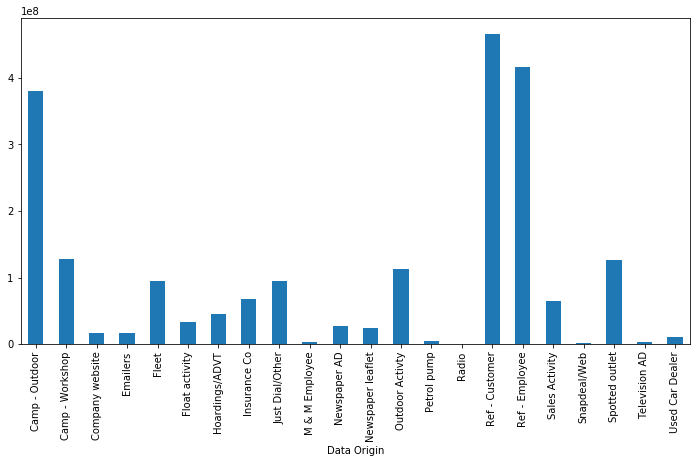

In [126]:
fig=plt.figure(figsize=(12,6))
ficust.groupby('Data Origin')['Total Amt Wtd Tax.'].sum().plot(kind = 'bar')

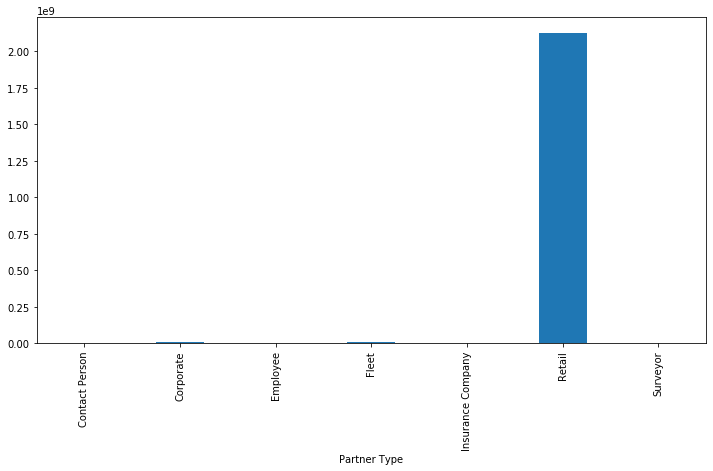

In [127]:
fig=plt.figure(figsize=(12,6))
ficust.groupby('Partner Type')['Total Amt Wtd Tax.'].sum().plot(kind = 'bar')

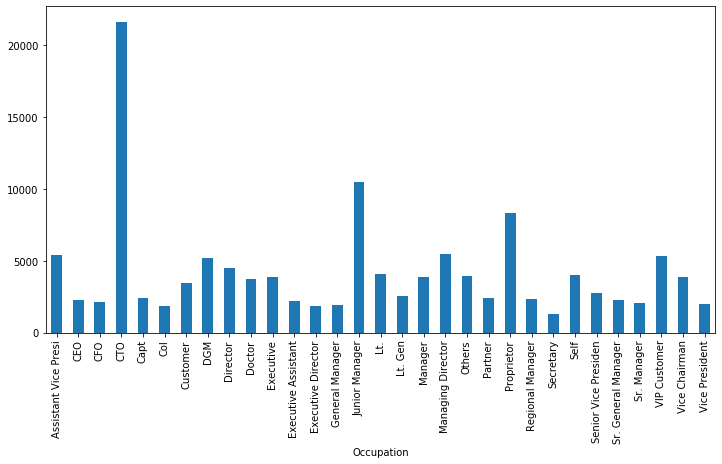

In [128]:
fig=plt.figure(figsize=(12,6))
ficust.groupby('Occupation')['Total Amt Wtd Tax.'].mean().plot(kind = 'bar')

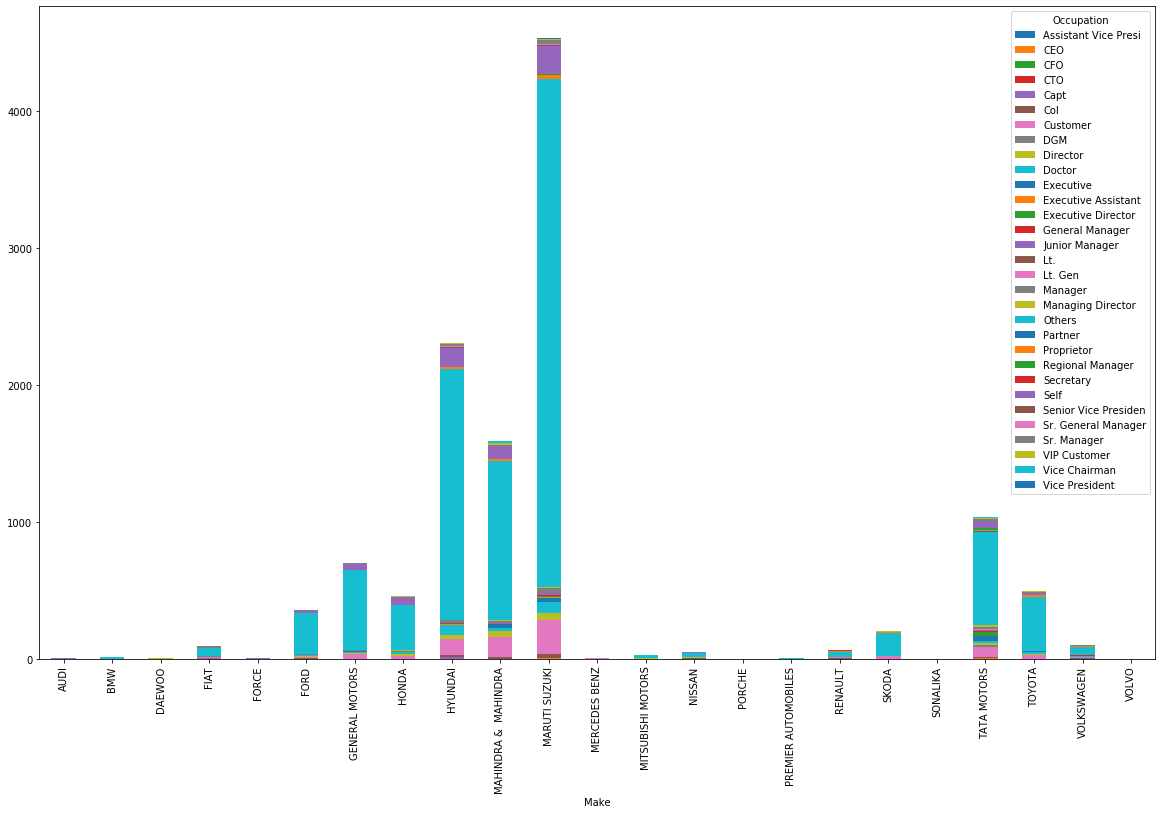

In [129]:
moc=ficust.groupby(['Make','Occupation']).size().unstack()
moc.plot(kind='bar',stacked=True,figsize=(20,12))

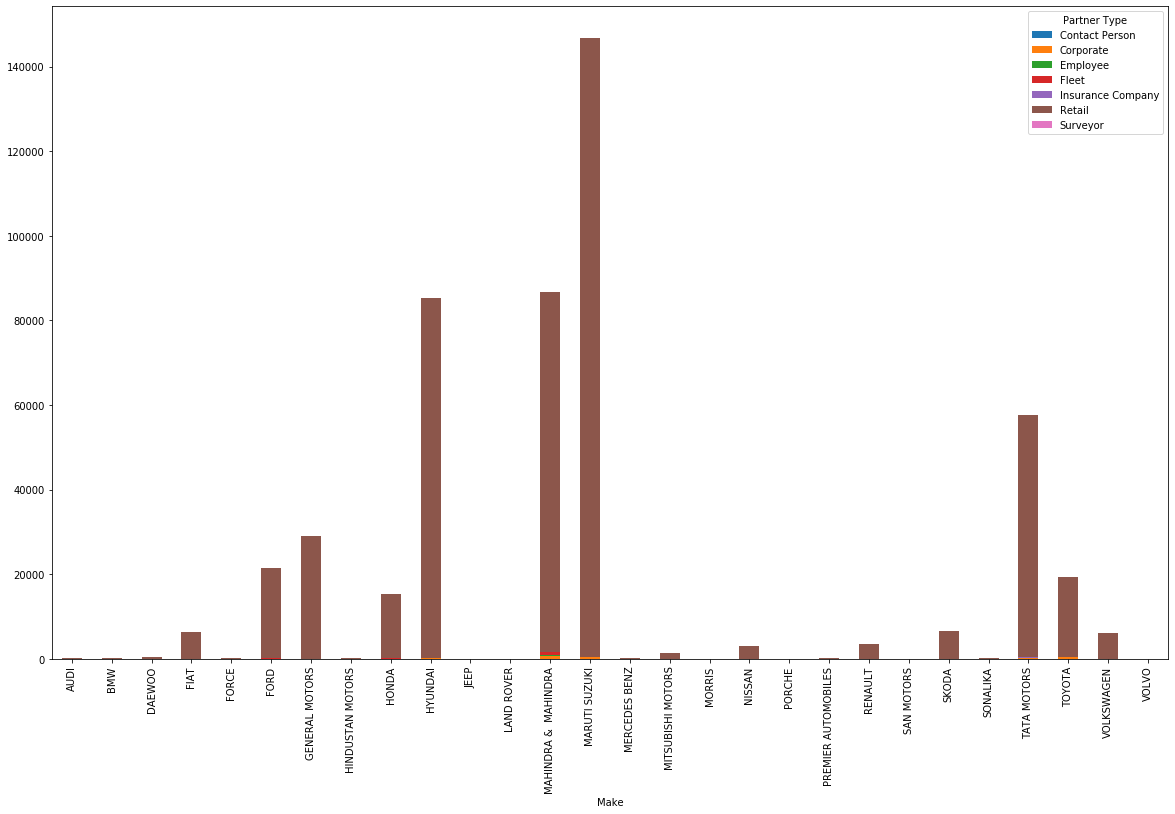

In [130]:
mpt=ficust.groupby(['Make','Partner Type']).size().unstack()
mpt.plot(kind='bar',stacked=True,figsize=(20,12))

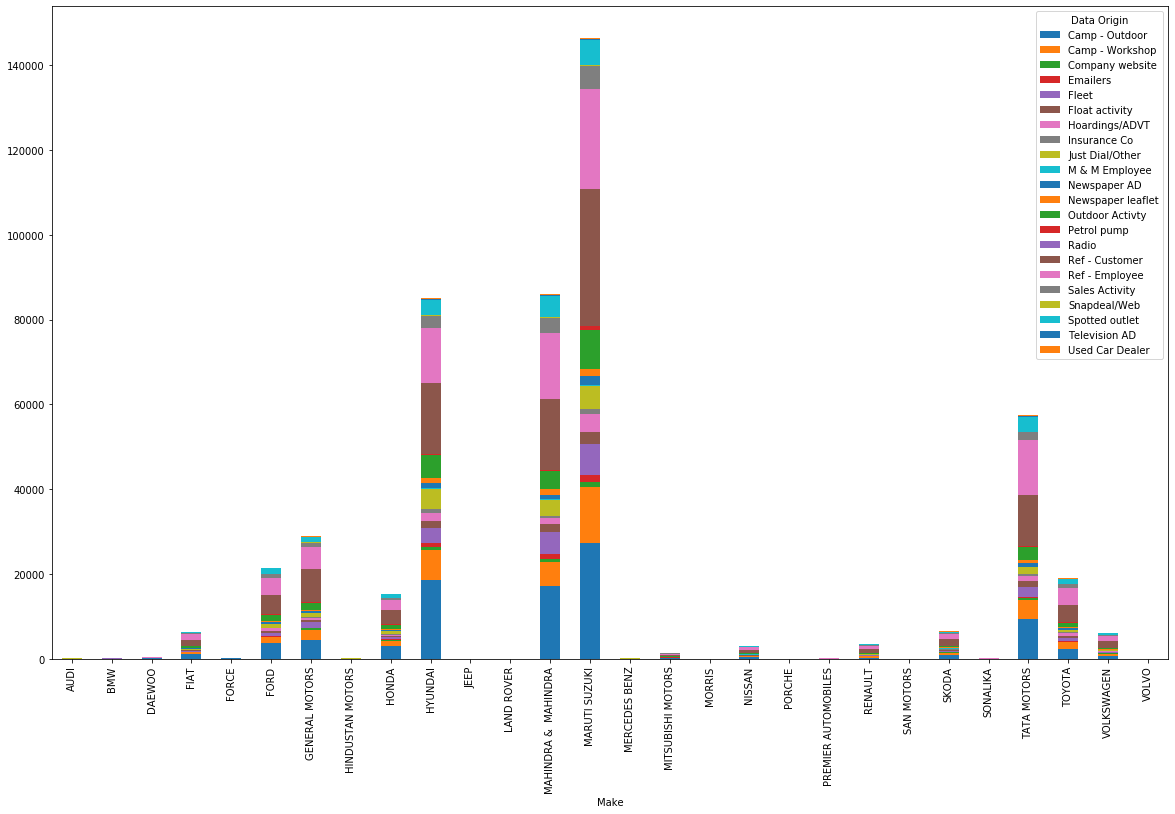

In [131]:
mdo=ficust.groupby(['Make','Data Origin']).size().unstack()
mdo.plot(kind='bar',stacked=True,figsize=(20,12))

# -Which areas have most cars? 

In [132]:
fi_areawise_cars = fi.groupby('District')['Make'].count().reset_index()

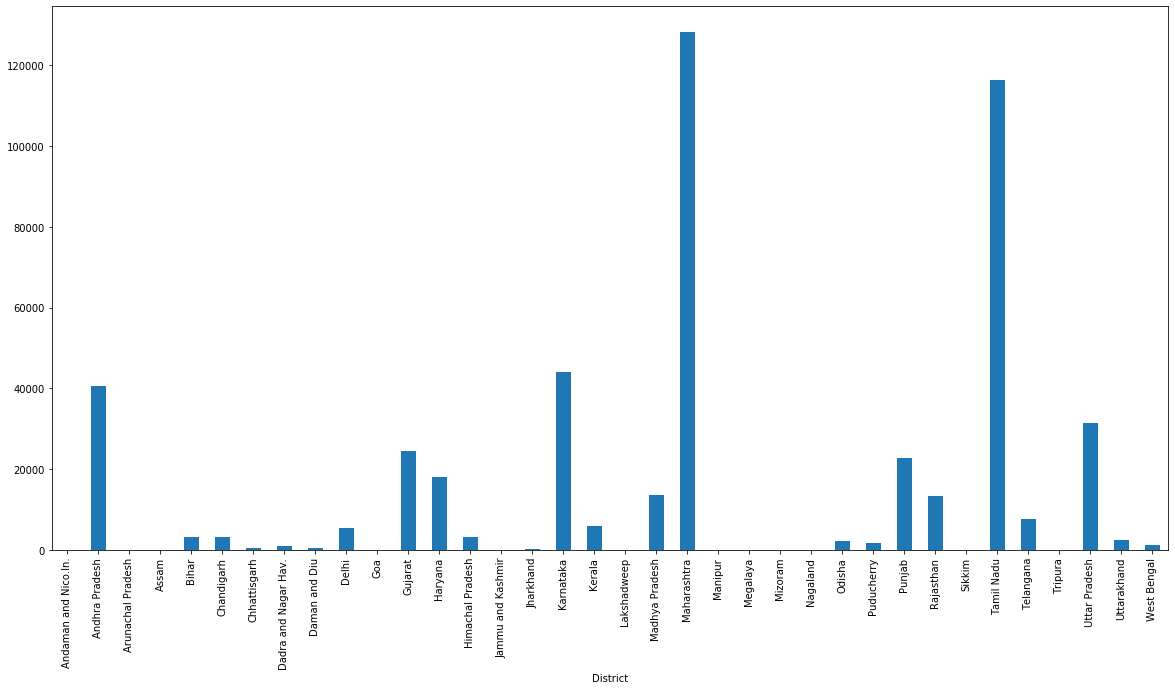

In [133]:
fig=plt.figure(figsize=(20,10))
fi_areawise_cars.groupby('District')['Make'].sum().plot(kind = 'bar')

# Which make/car is more popular?

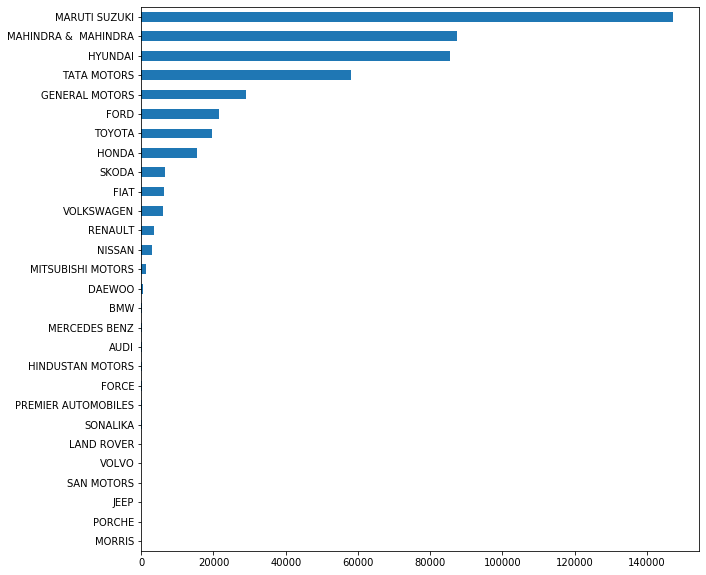

In [134]:
fi.Make.value_counts().sort_values().plot(kind = 'barh',figsize=(10,10))

# What is service structure for particular make/car?

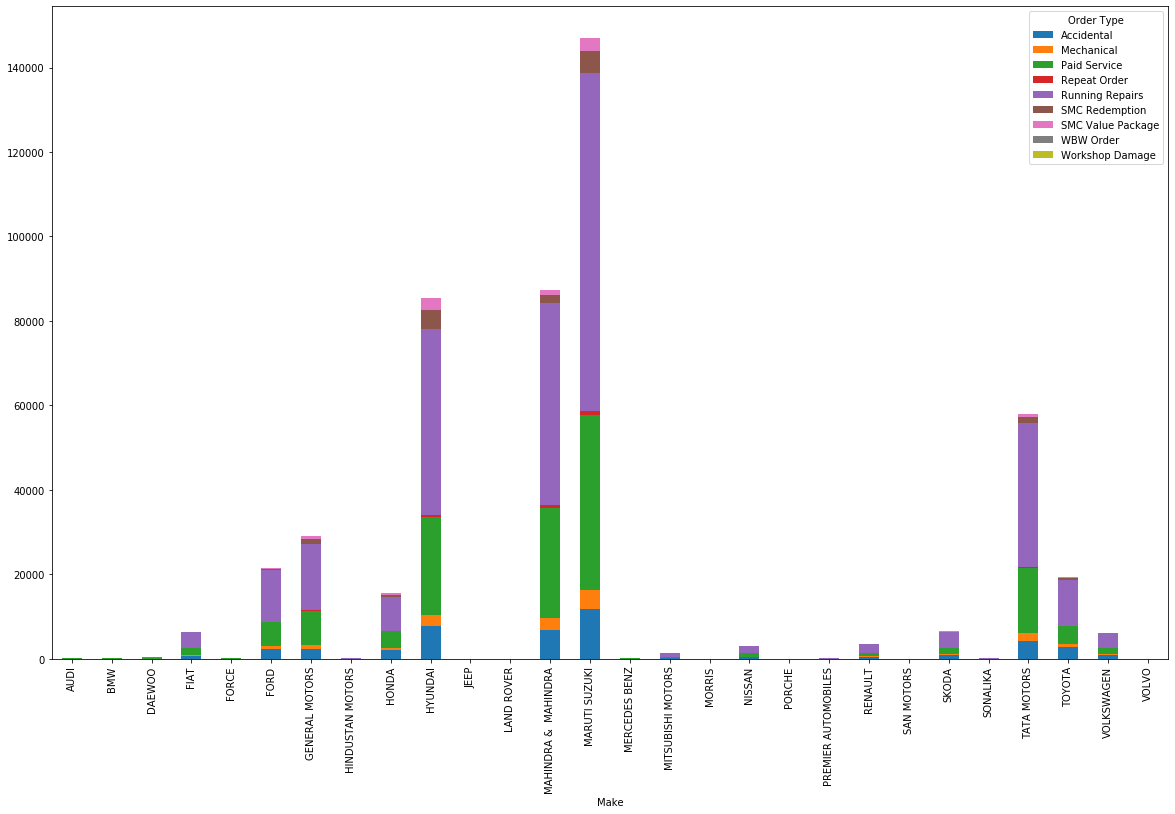

In [135]:
mot=ficust.groupby(['Make','Order Type']).size().unstack()
mot.plot(kind='bar',stacked=True,figsize=(20,12))

# Which type of service is popular in a certain area i.e. repairs or maintenance?

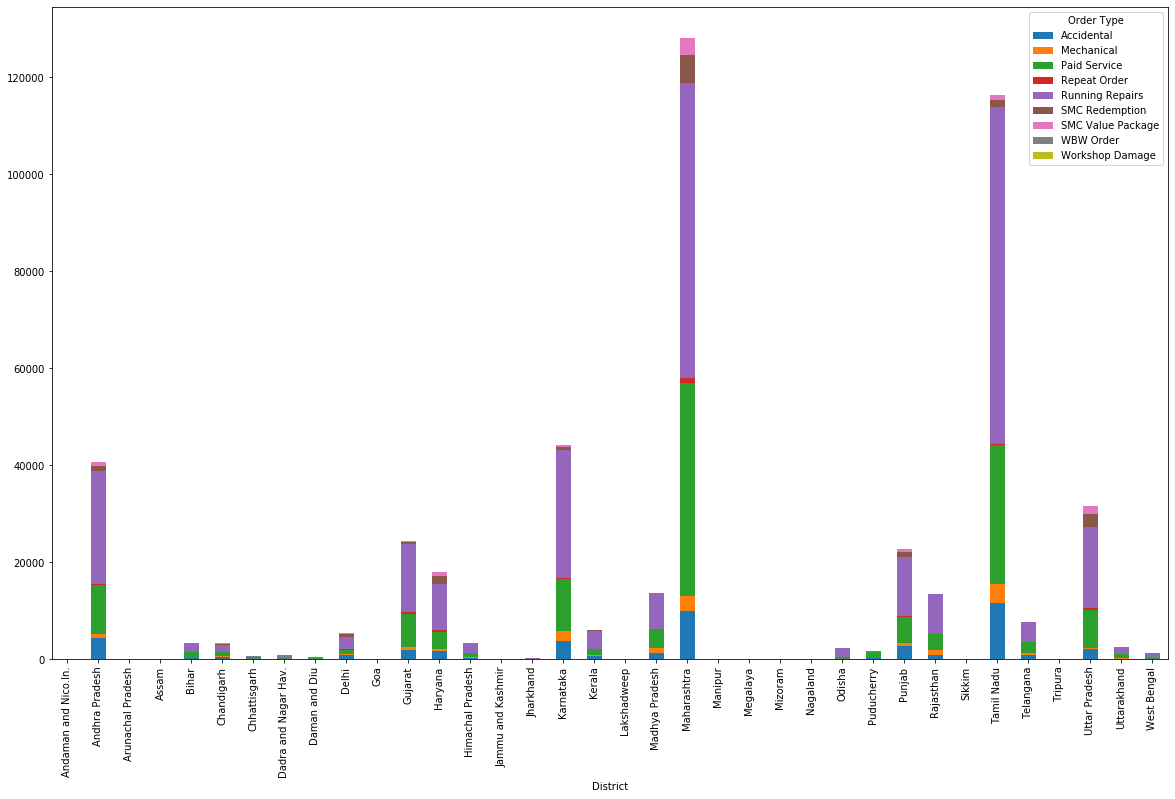

In [136]:
dot=ficust.groupby(['District','Order Type']).size().unstack()
dot.plot(kind='bar',stacked=True,figsize=(20,12))

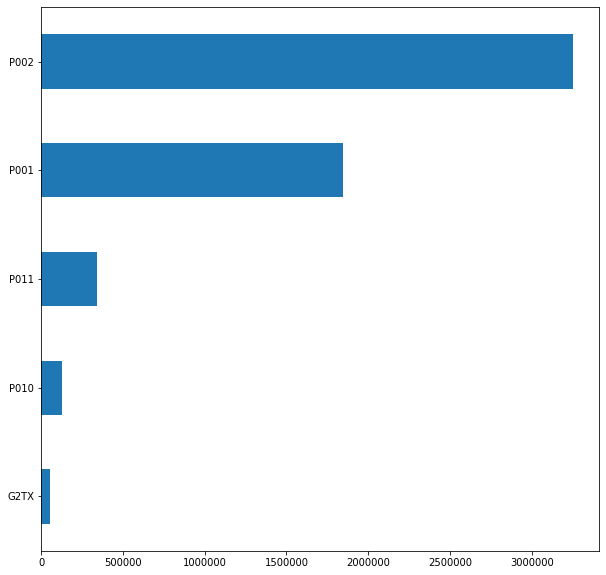

In [137]:
jtd['Item Category'].value_counts().sort_values().plot(kind = 'barh',figsize=(10,10))

# What are the different types of services provided?

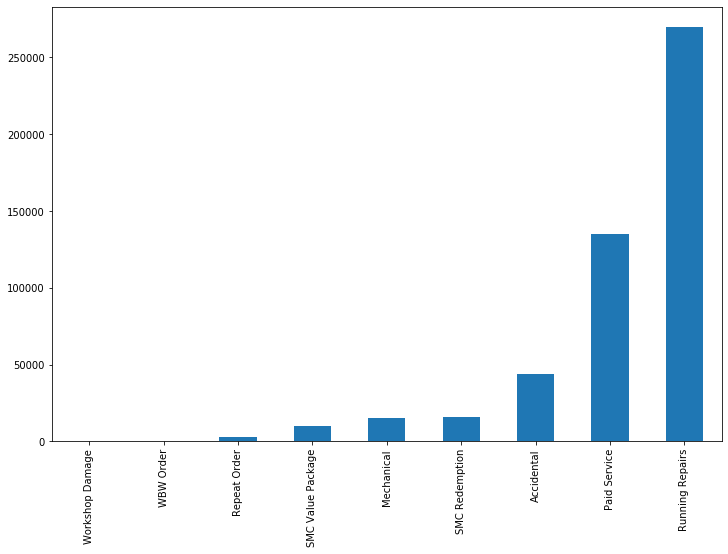

In [138]:
fi['Order Type'].value_counts().sort_values().plot(kind = 'bar',figsize=(12,8))

In [139]:
fi['Labour Total'].describe()

count    492314.000000
mean       1353.650700
std        3733.398162
min        -137.000000
25%           0.850000
50%         537.990000
75%        1274.997500
max      323000.000000
Name: Labour Total, dtype: float64

# What is the difference in each service/labour costing?

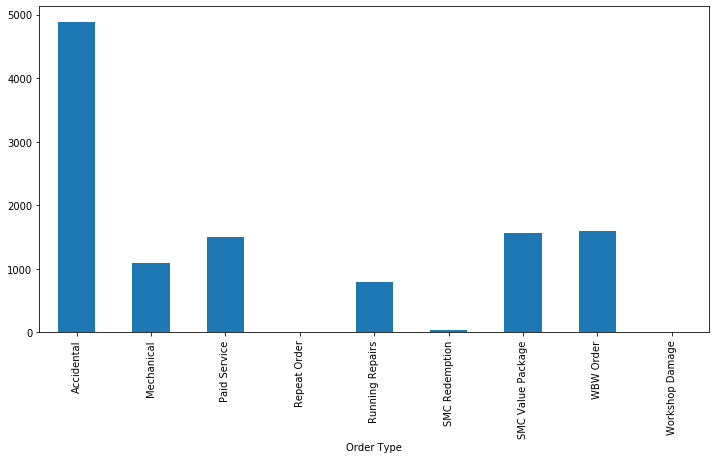

In [140]:
fig=plt.figure(figsize=(12,6))
fi.groupby('Order Type')['Labour Total'].mean().plot(kind = 'bar')

In [141]:
#jtdfi = pd.merge(jtd, fi, left_on='DBM Order', right_on='Job Card No').drop('Job Card No', axis=1)

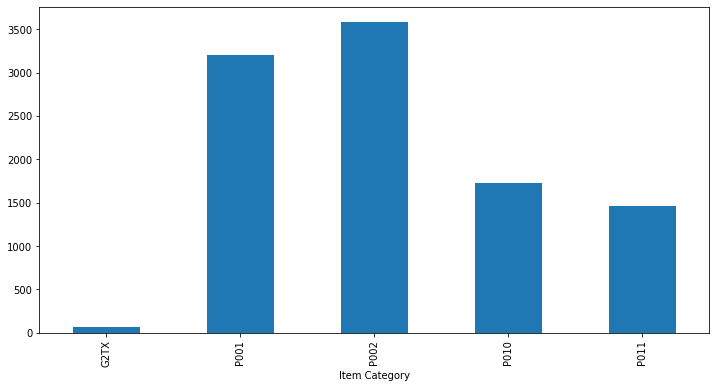

In [142]:
fig=plt.figure(figsize=(12,6))
jtdfi.groupby('Item Category')['Labour Total'].mean().plot(kind = 'bar')

In [143]:
fi_plant_type_revenue = fi.groupby(['InvoiceYearMonth','PlantType'])['Total Amt Wtd Tax.'].sum().reset_index()

# Is the service seasonal or regular?
yes mechanical service is seasonal

In [144]:
dd = pd.DataFrame({'Date': pd.to_datetime(fi['Invoice Date'])})
L = ['year', 'month', 'day']
date_gen = (getattr(dd['Date'].dt, i).rename(i) for i in L)
fi = fi.join(pd.concat(date_gen, axis=1))

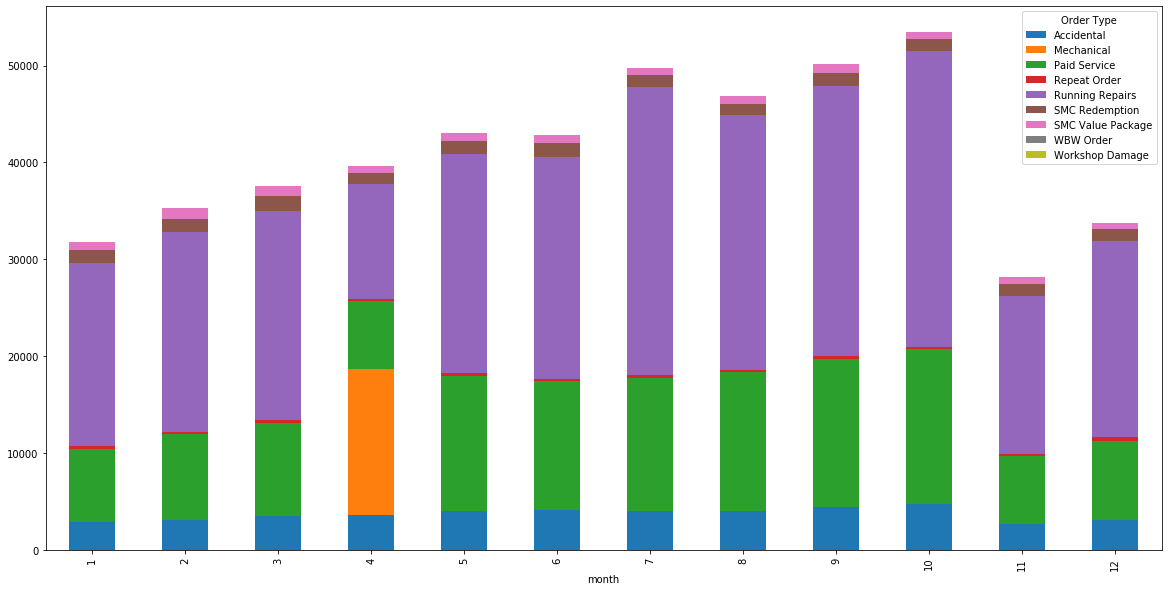

In [145]:
mot = fi.groupby(['month','Order Type']).size().unstack()
mot.plot(kind='bar',stacked=True,figsize=(20,10))

# Is the service mandatory or not?

In [146]:
fi_cs_r = fi.groupby(['Order Type'])['Customer No.'].nunique()/fi['Customer No.'].nunique()
fi_cs_r = fi_cs_r.reset_index()


In [147]:
fi_cs_r

,Order Type,Customer No.
0,Accidental,0.143189
1,Mechanical,0.053648
2,Paid Service,0.394849
3,Repeat Order,0.010943
4,Running Repairs,0.664346
5,SMC Redemption,0.034385
6,SMC Value Package,0.035809
7,WBW Order,0.000063
8,Workshop Damage,0.000067


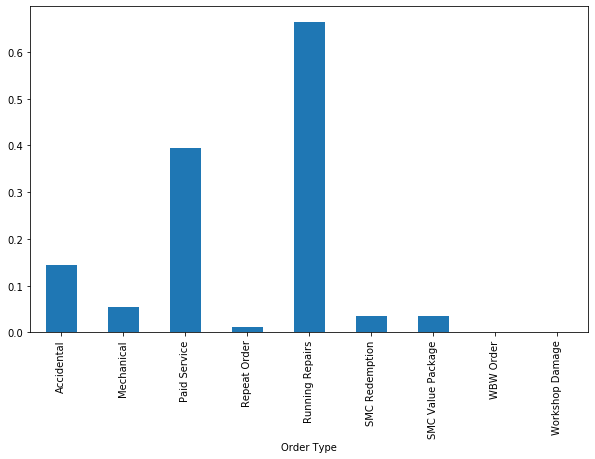

In [148]:
fig=plt.figure(figsize=(10,6))
fi_cs_r.groupby('Order Type')['Customer No.'].mean().plot(kind = 'bar')

In [149]:
jtd.head()

,Unnamed: 0,DBM Order,Order Item,Material,Labor Value Number,Description,Item Category,Order Quantity,Target quantity UoM,Net value
0,0,22385,180,OSLCC_SRV31,NaN,MACHINING RR.SUSPENSION CHARGE (MAJOR),P010,1.2,MIN,1869.87
1,1,23910,10,1DM279018170117,NaN,ASSY.OIL COOLER (6-PLATE) (VOR,P002,1.0,EA,2151.13
2,2,23910,40,1IS150203BE01,NaN,FRONT WHEEL BEARING/ LUBRICATE,P002,1.0,EA,2552.92
3,3,23910,60,1DM279001990173,NaN,ASSY.CYL.HEAD W /O INJ.(NA W /O,P002,1.0,EA,20360.14
4,4,23910,70,1DM88552790S001SA,NaN,Engine Overhaul Kit -Indica Di,P002,1.0,EA,10691.63


# Which inventory item is highly used?

In [150]:
jtd.Material.nunique()

126567

In [151]:
jtd.Description.nunique()

58558

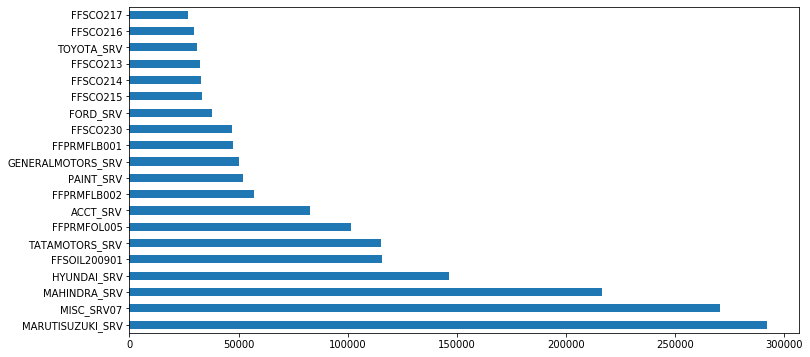

In [152]:
fig=plt.figure(figsize=(12,6))
jtd.Material.value_counts()[:20].plot(kind='barh')

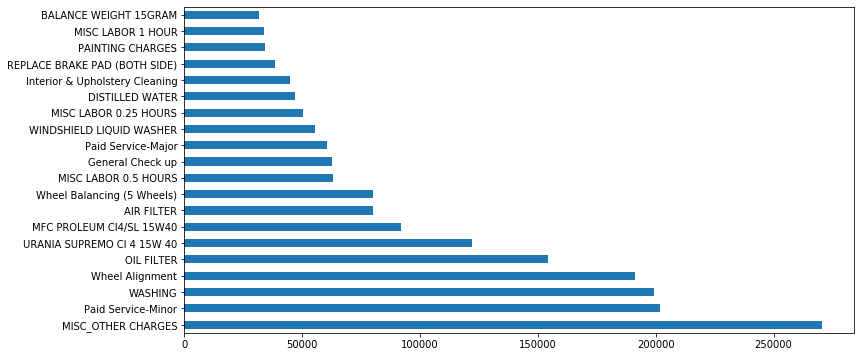

In [153]:
fig=plt.figure(figsize=(12,6))
jtd.Description.value_counts()[:20].plot(kind='barh')

In [154]:
jtdfi['Material'] = jtdfi['Material'].astype(str)
jtdfi['Description'] = jtdfi['Description'].astype(str)

In [155]:
jtdfi.head()

,Unnamed: 0_x,DBM Order,Order Item,Material,Labor Value Number,Description,Item Category,Order Quantity,Target quantity UoM,Net value,Unnamed: 0_y,Area / Locality,CITY,Cash /Cashless Type,Claim No.,Cust Type,Customer No.,District,Expiry Date,Gate Pass Date,Gate Pass Time,Insurance Company,Invoice Date,Invoice No,Invoice Time,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,ODN No.,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Policy no.,Print Status,Recovrbl Exp,Regn No,Technician Name,Total Amt Wtd Tax.,Total Value,User ID,Days,year,month,day
0,0,22385,180,OSLCC_SRV31,NaN,MACHINING RR.SUSPENSION CHARGE (MAJOR),P010,1.2,MIN,1869.87,564981,HYDERABAD,HYDERABAD,NaN,NaN,Retail,9969,Andhra Pradesh,NaN,NaN,00:00:00,NaN,2014-01-22,7000081194,14:19:26,2013-02-09,14:30:41,71803,0.0,MAHINDRA & MAHINDRA,0.00,LOGAN D,7.000081e+09,1869.87,Paid Service,0.00,500035,BC04,BALANAGAR,NaN,NO,0.0,AP28AY8040,laxminarayana,1869.87,1869.87,BC04SA1,347,2013,2,9
1,1,23910,10,1DM279018170117,NaN,ASSY.OIL COOLER (6-PLATE) (VOR,P002,1.0,EA,2151.13,587490,NaN,PUNE,NaN,NaN,Retail,E26912,Maharashtra,NaN,NaN,00:00:00,NaN,2014-04-08,7000103986,19:41:07,2013-02-25,15:14:59,220840,0.0,TATA MOTORS,1099.99,INDICA,7.000104e+09,9260.95,Paid Service,41990.54,411038,BC02,PUNE,NaN,NO,0.0,MH12CD3403,SAJID,52351.48,52351.48,BC02SA1,407,2013,2,25
2,2,23910,40,1IS150203BE01,NaN,FRONT WHEEL BEARING/ LUBRICATE,P002,1.0,EA,2552.92,587490,NaN,PUNE,NaN,NaN,Retail,E26912,Maharashtra,NaN,NaN,00:00:00,NaN,2014-04-08,7000103986,19:41:07,2013-02-25,15:14:59,220840,0.0,TATA MOTORS,1099.99,INDICA,7.000104e+09,9260.95,Paid Service,41990.54,411038,BC02,PUNE,NaN,NO,0.0,MH12CD3403,SAJID,52351.48,52351.48,BC02SA1,407,2013,2,25
3,3,23910,60,1DM279001990173,NaN,ASSY.CYL.HEAD W /O INJ.(NA W /O,P002,1.0,EA,20360.14,587490,NaN,PUNE,NaN,NaN,Retail,E26912,Maharashtra,NaN,NaN,00:00:00,NaN,2014-04-08,7000103986,19:41:07,2013-02-25,15:14:59,220840,0.0,TATA MOTORS,1099.99,INDICA,7.000104e+09,9260.95,Paid Service,41990.54,411038,BC02,PUNE,NaN,NO,0.0,MH12CD3403,SAJID,52351.48,52351.48,BC02SA1,407,2013,2,25
4,4,23910,70,1DM88552790S001SA,NaN,Engine Overhaul Kit -Indica Di,P002,1.0,EA,10691.63,587490,NaN,PUNE,NaN,NaN,Retail,E26912,Maharashtra,NaN,NaN,00:00:00,NaN,2014-04-08,7000103986,19:41:07,2013-02-25,15:14:59,220840,0.0,TATA MOTORS,1099.99,INDICA,7.000104e+09,9260.95,Paid Service,41990.54,411038,BC02,PUNE,NaN,NO,0.0,MH12CD3403,SAJID,52351.48,52351.48,BC02SA1,407,2013,2,25


# Which state/area is the inventory in high demand?

In [156]:
dmdm=jtdfi.groupby('Material')['District'].value_counts()
pd.DataFrame(dmdm)
dmdm.groupby(['District']).idxmax()

District
Andaman and Nico.In.       (MISC_SRV07, Andaman and Nico.In.)
Andhra Pradesh             (MARUTISUZUKI_SRV, Andhra Pradesh)
Arunachal Pradesh       (MARUTISUZUKI_SRV, Arunachal Pradesh)
Assam                               (MARUTISUZUKI_SRV, Assam)
Bihar                                   (MAHINDRA_SRV, Bihar)
Chandigarh                           (MISC_SRV07, Chandigarh)
Chhattisgarh                 (MARUTISUZUKI_SRV, Chhattisgarh)
Dadra and Nagar Hav.       (MISC_SRV07, Dadra and Nagar Hav.)
Daman and Diu                     (MISC_SRV07, Daman and Diu)
Delhi                               (MARUTISUZUKI_SRV, Delhi)
Goa                                           (ACCT_SRV, Goa)
Gujarat                           (MARUTISUZUKI_SRV, Gujarat)
Haryana                           (MARUTISUZUKI_SRV, Haryana)
Himachal Pradesh         (MARUTISUZUKI_SRV, Himachal Pradesh)
Jammu and Kashmir       (MARUTISUZUKI_SRV, Jammu and Kashmir)
Jharkhand                             (MISC_SRV07, Jharkhand)

# Which make/car is the inventory item used by most?

In [157]:
dmmk=jtdfi.groupby('Material')['Make'].value_counts()
pd.DataFrame(dmmk)
dmmk.groupby(['Make']).idxmax()

Make
AUDI                                        (AUDI_SRV, AUDI)
BMW                                           (BMW_SRV, BMW)
DAEWOO                                  (DAEWOO_SRV, DAEWOO)
FIAT                                        (FIAT_SRV, FIAT)
FORCE                                     (FORCE_SRV, FORCE)
FORD                                        (FORD_SRV, FORD)
GENERAL MOTORS           (GENERALMOTORS_SRV, GENERAL MOTORS)
HINDUSTAN MOTORS                  (HM_SRV, HINDUSTAN MOTORS)
HONDA                                     (HONDA_SRV, HONDA)
HYUNDAI                               (HYUNDAI_SRV, HYUNDAI)
JEEP                                      (MISC_SRV07, JEEP)
LAND ROVER                           (ROVER_SRV, LAND ROVER)
MAHINDRA &  MAHINDRA    (MAHINDRA_SRV, MAHINDRA &  MAHINDRA)
MARUTI SUZUKI              (MARUTISUZUKI_SRV, MARUTI SUZUKI)
MERCEDES BENZ              (MERCEDESBENZ_SRV, MERCEDES BENZ)
MITSUBISHI MOTORS        (MITSUBISHI_SRV, MITSUBISHI MOTORS)
MORRIS             

# What is service structure for particular make/car?

In [158]:
otmk=jtdfi.groupby('Order Type')['Make'].value_counts()
pd.DataFrame(otmk)
otmk.groupby(['Make']).idxmax()

Make
AUDI                                   (Running Repairs, AUDI)
BMW                                     (Running Repairs, BMW)
DAEWOO                               (Running Repairs, DAEWOO)
FIAT                                   (Running Repairs, FIAT)
FORCE                                 (Running Repairs, FORCE)
FORD                                   (Running Repairs, FORD)
GENERAL MOTORS               (Running Repairs, GENERAL MOTORS)
HINDUSTAN MOTORS           (Running Repairs, HINDUSTAN MOTORS)
HONDA                                 (Running Repairs, HONDA)
HYUNDAI                                (Paid Service, HYUNDAI)
JEEP                                   (Running Repairs, JEEP)
LAND ROVER                       (Running Repairs, LAND ROVER)
MAHINDRA &  MAHINDRA      (Paid Service, MAHINDRA &  MAHINDRA)
MARUTI SUZUKI                    (Paid Service, MARUTI SUZUKI)
MERCEDES BENZ                 (Running Repairs, MERCEDES BENZ)
MITSUBISHI MOTORS         (Running Repairs, MITSUB

# Which type of service is popular in a certain area i.e. repairs or maintenance?

In [159]:
otds=jtdfi.groupby('Order Type')['District'].value_counts()
pd.DataFrame(otds)
otds.groupby(['District']).idxmax()

District
Andaman and Nico.In.    (Running Repairs, Andaman and Nico.In.)
Andhra Pradesh                (Running Repairs, Andhra Pradesh)
Arunachal Pradesh          (Running Repairs, Arunachal Pradesh)
Assam                                     (Paid Service, Assam)
Bihar                                     (Paid Service, Bihar)
Chandigarh                           (Paid Service, Chandigarh)
Chhattisgarh                       (Paid Service, Chhattisgarh)
Dadra and Nagar Hav.    (Running Repairs, Dadra and Nagar Hav.)
Daman and Diu                  (Running Repairs, Daman and Diu)
Delhi                                       (Accidental, Delhi)
Goa                                         (Paid Service, Goa)
Gujarat                              (Running Repairs, Gujarat)
Haryana                                 (Paid Service, Haryana)
Himachal Pradesh               (Paid Service, Himachal Pradesh)
Jammu and Kashmir             (Paid Service, Jammu and Kashmir)
Jharkhand                      

In [160]:
ficust.head()

,Unnamed: 0,Area / Locality,CITY,Cash /Cashless Type,Claim No.,Cust Type,Customer No.,District,Expiry Date,Gate Pass Date,Gate Pass Time,Insurance Company,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,ODN No.,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Policy no.,Print Status,Recovrbl Exp,Regn No,Technician Name,Total Amt Wtd Tax.,Total Value,User ID,Days,InvoiceYearMonth,MinPurchaseDate,MinPurchaseYearMonth,UserType,MinServiceDate,MinServiceYearMonth,PlantType,Business Partner,Partner Type,Data Origin,Title,Marital Status,Occupation,Date of Birth,Death date
0,0,MAJIWADA,THANE,NaN,NaN,Retail,67849,Maharashtra,NaN,NaN,00:00:00,NaN,2015-01-02,7005200002,11:30:36,168303,2014-12-13,14:29:43,49317,1203.14,GENERAL MOTORS,0.0,SPARK,7.005200e+09,500.06,Paid Service,2348.75,400601,BC01,THANE,NaN,NO,0.0,KA19MA1291,RUPESH,4051.95,4051.95,BC01FS1,20,201501,2014-08-14,201408,Existing,2012-04-02,201204,Existing,71941,Retail,Used Car Dealer,Mr.,NaN,NaN,NaN,NaT
1,619842,MAJIWADA,THANE,CASHLESS,MOT03977311,Retail,67849,Maharashtra,NaN,NaN,00:00:00,NaN,2014-08-14,7000137359,17:54:30,136482,2014-08-08,15:26:53,45575,989.98,GENERAL MOTORS,0.0,SPARK,7.000137e+09,6249.87,Accidental,4230.25,400601,BC01,THANE,NaN,NO,0.0,KA19MA1291,AMARNATH,11470.10,11470.10,BC01FS1,6,201408,2014-08-14,201408,New,2012-04-02,201204,Existing,71941,Retail,Used Car Dealer,Mr.,NaN,NaN,NaN,NaT
2,619970,MAJIWADA,THANE,NaN,NaN,Retail,67849,Maharashtra,NaN,NaN,00:00:00,NaN,2014-08-16,7000137489,10:52:30,135895,2014-08-06,12:49:48,45575,6473.05,GENERAL MOTORS,0.0,SPARK,7.000137e+09,7325.09,Paid Service,14546.14,400601,BC01,THANE,NaN,NO,0.0,KA19MA1291,RUPESH,28344.28,28344.28,BC01FS1,10,201408,2014-08-14,201408,New,2012-04-02,201204,Existing,71941,Retail,Used Car Dealer,Mr.,NaN,NaN,NaN,NaT
3,632962,MAJIWADA,THANE,NaN,NaN,Retail,67849,Maharashtra,NaN,NaN,00:00:00,NaN,2014-10-09,7000151113,17:35:30,150383,2014-10-06,11:40:52,47556,0.00,GENERAL MOTORS,0.0,SPARK,7.000151e+09,0.00,Running Repairs,200.00,400601,BC01,THANE,NaN,NO,0.0,KA19MA1291,HARSHAD,200.00,200.00,BC01SA1,3,201410,2014-08-14,201408,Existing,2012-04-02,201204,Existing,71941,Retail,Used Car Dealer,Mr.,NaN,NaN,NaN,NaT
4,655371,MAJIWADA,THANE,CASHLESS,MOTO4249094,Retail,67849,Maharashtra,NaN,NaN,00:00:00,NaN,2014-12-31,7000175211,18:41:00,168210,2014-12-13,12:14:37,49317,1760.02,GENERAL MOTORS,500.0,SPARK,7.000175e+09,7850.09,Accidental,20348.81,400601,BC01,THANE,NaN,NO,0.0,KA19MA1291,AMARNATH,30458.92,30458.92,BC01FS1,18,201412,2014-08-14,201408,Existing,2012-04-02,201204,Existing,71941,Retail,Used Car Dealer,Mr.,NaN,NaN,NaN,NaT


# Which marketing source brings the most business?

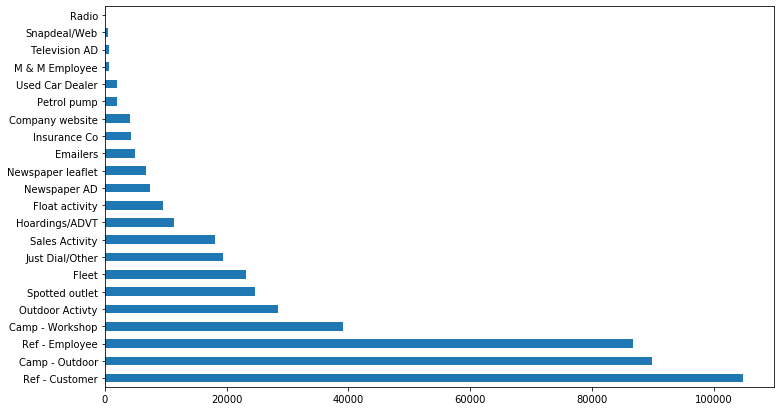

In [161]:
fig=plt.figure(figsize=(12,7))
ficust['Data Origin'].value_counts().plot(kind='barh')

# What is the average income per source?

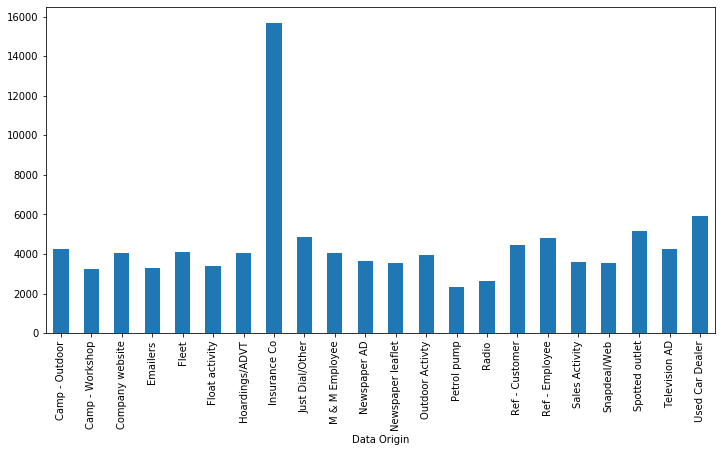

In [162]:
fig=plt.figure(figsize=(12,6))
ficust.groupby('Data Origin')['Total Amt Wtd Tax.'].mean().plot(kind = 'bar')

# Which source has the most reach?

In [163]:
ficust.CITY.nunique()

17293

In [164]:
ficust_reach = ficust.groupby(['Data Origin'])['CITY'].nunique().reset_index()

In [165]:
ficust_reach

,Data Origin,CITY
0,Camp - Outdoor,3958
1,Camp - Workshop,2091
2,Company website,436
3,Emailers,291
4,Fleet,1389
5,Float activity,561
6,Hoardings/ADVT,639
7,Insurance Co,547
8,Just Dial/Other,819
9,M & M Employee,110


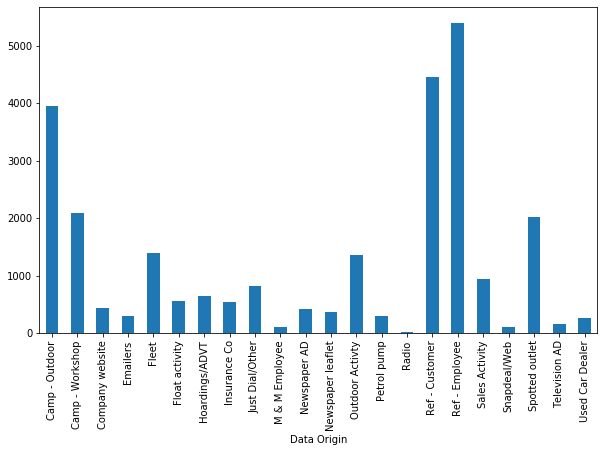

In [166]:
fig=plt.figure(figsize=(10,6))
ficust_reach.groupby('Data Origin')['CITY'].mean().plot(kind = 'bar')

# Customer Segmentation

In [167]:
#create a generic user dataframe to keep CustomerID and new segmentation scores
fi_user = pd.DataFrame(fi['Customer No.'].unique())
fi_user.columns = ['Customer No.']

#get the max purchase date for each customer and create a dataframe with it
fi_max_purchase = fi.groupby('Customer No.')['Invoice Date'].max().reset_index()
fi_max_purchase.columns = ['Customer No.','MaxPurchaseDate']

#we take our observation point as the max invoice date in our dataset
fi_max_purchase['Recency'] = (fi_max_purchase['MaxPurchaseDate'].max() - fi_max_purchase['MaxPurchaseDate']).dt.days

#merge this dataframe to our new user dataframe
fi_user = pd.merge(fi_user, fi_max_purchase[['Customer No.','Recency']], on='Customer No.')

fi_user.describe()

,Recency
count,253484.000000
mean,427.899035
std,401.075875
min,0.000000
25%,97.000000
50%,281.000000
75%,684.000000
max,1673.000000


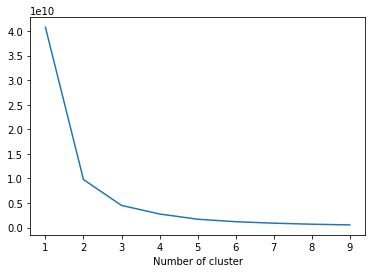

In [168]:
from sklearn.cluster import KMeans

sse={}
fi_recency = fi_user[['Recency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(fi_recency)
    fi_recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [169]:
#build 4 clusters for recency and add it to dataframe
kmeans = KMeans(n_clusters=4)
kmeans.fit(fi_user[['Recency']])
fi_user['RecencyCluster'] = kmeans.predict(fi_user[['Recency']])

#function for ordering cluster numbers
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

fi_user = order_cluster('RecencyCluster', 'Recency',fi_user,False)

In [170]:
fi_user.RecencyCluster.value_counts()

3    128009
2     60371
1     42973
0     22131
Name: RecencyCluster, dtype: int64

In [171]:
fi_user[130039:289992]

,Customer No.,Recency,RecencyCluster
130039,254603,12,3
130040,254602,12,3
130041,254167,12,3
130042,254168,12,3
130043,254188,12,3
...,...,...,...
253479,32017,1089,0
253480,32143,1089,0
253481,32020,1089,0
253482,32204,1088,0


In [172]:
#get order counts for each user and create a dataframe with it
fi_frequency = fi.groupby('Customer No.')['Invoice Date'].count().reset_index()
fi_frequency.columns = ['Customer No.','Frequency']

#add this data to our main dataframe
fi_user = pd.merge(fi_user, fi_frequency, on='Customer No.')


In [173]:
#k-means
kmeans = KMeans(n_clusters=4)
kmeans.fit(fi_user[['Frequency']])
fi_user['FrequencyCluster'] = kmeans.predict(fi_user[['Frequency']])

#order the frequency cluster
fi_user = order_cluster('FrequencyCluster', 'Frequency',fi_user,True)

#see details of each cluster
fi_user.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,235560.0,1.504203,0.832602,1.0,1.0,1.0,2.0,4.0
1,17916.0,7.384963,4.755606,5.0,5.0,6.0,8.0,157.0
2,7.0,429.571429,161.590900,251.0,328.5,360.0,525.5,688.0
3,1.0,2668.000000,NaN,2668.0,2668.0,2668.0,2668.0,2668.0


In [174]:
fi_user.Frequency.describe()

count    253484.000000
mean          1.942190
std           6.182509
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max        2668.000000
Name: Frequency, dtype: float64

In [175]:
#calculate revenue for each customer
fi_revenue = fi.groupby('Customer No.')['Total Amt Wtd Tax.'].sum().reset_index()

#merge it with our main dataframe
fi_user = pd.merge(fi_user, fi_revenue, on='Customer No.')


In [176]:
fi_user

,Customer No.,Recency,RecencyCluster,Frequency,FrequencyCluster,Total Amt Wtd Tax.
0,67849,668,2,5,1,74525.25
1,84419,322,2,6,1,3638.60
2,18980,323,2,8,1,46664.46
3,12523,385,2,7,1,25743.49
4,7303,441,2,14,1,82661.44
...,...,...,...,...,...,...
253479,E11206,11,3,688,2,1646913.03
253480,14505,124,3,441,2,1316869.35
253481,412,80,3,610,2,3801248.91
253482,221957,0,3,333,2,77270.13


In [177]:
#apply clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(fi_user[['Total Amt Wtd Tax.']])
fi_user['RevenueCluster'] = kmeans.predict(fi_user[['Total Amt Wtd Tax.']])


#order the cluster numbers
fi_user = order_cluster('RevenueCluster', 'Total Amt Wtd Tax.',fi_user,True)

#show details of the dataframe
fi_user.groupby('RevenueCluster')['Total Amt Wtd Tax.'].describe()

,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,246086.0,5.891998e+03,8565.189644,-0.01,4.782800e+02,2.413340e+03,7.328888e+03,48493.02
1,7377.0,9.128823e+04,58759.756357,48497.21,5.730078e+04,7.126816e+04,1.006616e+05,657705.63
2,20.0,1.424063e+06,731390.924531,854562.73,9.184106e+05,1.097349e+06,1.655018e+06,3801248.91
3,1.0,1.185973e+07,NaN,11859728.34,1.185973e+07,1.185973e+07,1.185973e+07,11859728.34


In [178]:
#calculate overall score and use mean() to see details
fi_user['OverallScore'] = fi_user['RecencyCluster'] + fi_user['FrequencyCluster'] + fi_user['RevenueCluster']
fi_user.groupby('OverallScore')['Recency','Frequency','Total Amt Wtd Tax.'].mean()

,Recency,Frequency,Total Amt Wtd Tax.
OverallScore,,,
0,1291.871306,1.365039,4.934979e+03
1,888.295730,1.582901,5.765950e+03
2,480.565141,1.708894,7.000352e+03
3,130.334426,1.718539,6.513655e+03
4,142.129540,6.159527,3.932428e+04
5,114.197406,10.820643,9.685973e+04
6,62.454545,102.818182,1.208959e+06
7,91.000000,445.666667,1.874072e+06
9,48.000000,2668.000000,1.185973e+07


In [179]:
fi_user['Segment'] = 'Low-Value'
fi_user.loc[fi_user['OverallScore']>2,'Segment'] = 'Mid-Value' 
fi_user.loc[fi_user['OverallScore']>4,'Segment'] = 'High-Value' 

In [180]:
fi_user

,Customer No.,Recency,RecencyCluster,Frequency,FrequencyCluster,Total Amt Wtd Tax.,RevenueCluster,OverallScore,Segment
0,67849,668,2,5,1,74525.25,1,4,Mid-Value
1,7303,441,2,14,1,82661.44,1,4,Mid-Value
2,E6634,448,2,13,1,55377.53,1,4,Mid-Value
3,8120,331,2,7,1,76040.79,1,4,Mid-Value
4,5182,343,2,12,1,60158.00,1,4,Mid-Value
...,...,...,...,...,...,...,...,...,...
253479,E1205,168,3,324,2,1629697.45,2,7,High-Value
253480,E11206,11,3,688,2,1646913.03,2,7,High-Value
253481,14505,124,3,441,2,1316869.35,2,7,High-Value
253482,412,80,3,610,2,3801248.91,2,7,High-Value


In [181]:
fi

,Unnamed: 0,Area / Locality,CITY,Cash /Cashless Type,Claim No.,Cust Type,Customer No.,District,Expiry Date,Gate Pass Date,Gate Pass Time,Insurance Company,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,ODN No.,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Policy no.,Print Status,Recovrbl Exp,Regn No,Technician Name,Total Amt Wtd Tax.,Total Value,User ID,Days,InvoiceYearMonth,MinPurchaseDate,MinPurchaseYearMonth,UserType,MinServiceDate,MinServiceYearMonth,PlantType,year,month,day
0,0,MAJIWADA,THANE,NaN,NaN,Retail,67849,Maharashtra,NaN,NaN,00:00:00,NaN,2015-01-02,7005200002,11:30:36,168303,2014-12-13,14:29:43,49317,1203.14,GENERAL MOTORS,0.0,SPARK,7.005200e+09,500.06,Paid Service,2348.75,400601,BC01,THANE,NaN,NO,0.0,KA19MA1291,RUPESH,4051.95,4051.95,BC01FS1,20,201501,2014-08-14,201408,Existing,2012-04-02,201204,Existing,2015,1,2
1,619842,MAJIWADA,THANE,CASHLESS,MOT03977311,Retail,67849,Maharashtra,NaN,NaN,00:00:00,NaN,2014-08-14,7000137359,17:54:30,136482,2014-08-08,15:26:53,45575,989.98,GENERAL MOTORS,0.0,SPARK,7.000137e+09,6249.87,Accidental,4230.25,400601,BC01,THANE,NaN,NO,0.0,KA19MA1291,AMARNATH,11470.10,11470.10,BC01FS1,6,201408,2014-08-14,201408,New,2012-04-02,201204,Existing,2014,8,14
2,619970,MAJIWADA,THANE,NaN,NaN,Retail,67849,Maharashtra,NaN,NaN,00:00:00,NaN,2014-08-16,7000137489,10:52:30,135895,2014-08-06,12:49:48,45575,6473.05,GENERAL MOTORS,0.0,SPARK,7.000137e+09,7325.09,Paid Service,14546.14,400601,BC01,THANE,NaN,NO,0.0,KA19MA1291,RUPESH,28344.28,28344.28,BC01FS1,10,201408,2014-08-14,201408,New,2012-04-02,201204,Existing,2014,8,16
3,632962,MAJIWADA,THANE,NaN,NaN,Retail,67849,Maharashtra,NaN,NaN,00:00:00,NaN,2014-10-09,7000151113,17:35:30,150383,2014-10-06,11:40:52,47556,0.00,GENERAL MOTORS,0.0,SPARK,7.000151e+09,0.00,Running Repairs,200.00,400601,BC01,THANE,NaN,NO,0.0,KA19MA1291,HARSHAD,200.00,200.00,BC01SA1,3,201410,2014-08-14,201408,Existing,2012-04-02,201204,Existing,2014,10,9
4,655371,MAJIWADA,THANE,CASHLESS,MOTO4249094,Retail,67849,Maharashtra,NaN,NaN,00:00:00,NaN,2014-12-31,7000175211,18:41:00,168210,2014-12-13,12:14:37,49317,1760.02,GENERAL MOTORS,500.0,SPARK,7.000175e+09,7850.09,Accidental,20348.81,400601,BC01,THANE,NaN,NO,0.0,KA19MA1291,AMARNATH,30458.92,30458.92,BC01FS1,18,201412,2014-08-14,201408,Existing,2012-04-02,201204,Existing,2014,12,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492309,906492,BAZPUR,BAZPUR,NaN,NaN,Retail,259764,Uttarakhand,NaN,NaN,00:00:00,NaN,2016-10-26,7236400007,17:39:21,496138,2016-10-26,17:20:06,98151,852.13,MARUTI SUZUKI,0.0,SWIFT,NaN,0.00,Running Repairs,0.00,262401,X432,X432 - HARSH AUTOMOBILES,NaN,NO,0.0,HR05Y0830,NaN,852.13,NaN,X432SA1,0,201610,2016-10-26,201610,New,2016-10-23,201610,New,2016,10,26
492310,906493,MEERUT,MEERUT,NaN,NaN,Retail,259835,Uttar Pradesh,NaN,NaN,00:00:00,NaN,2016-10-26,7236400008,18:50:27,496256,2016-10-26,18:41:52,18489,200.92,HYUNDAI,0.0,SANTRO,NaN,0.00,Running Repairs,0.00,250221,X432,X432 - HARSH AUTOMOBILES,NaN,NO,0.0,UP15BC9975,NaN,200.92,NaN,X432SA1,0,201610,2016-10-26,201610,New,2016-10-23,201610,New,2016,10,26
492311,906494,BAZPUR,BAZPUR,NaN,NaN,Retail,260309,Uttarakhand,NaN,NaN,00:00:00,NaN,2016-10-27,7236400010,15:08:00,497081,2016-10-27,14:40:24,73039,199.07,MAHINDRA & MAHINDRA,0.0,SCORPIO CRDE,NaN,0.00,Running Repairs,0.00,262401,X432,X432 - HARSH AUTOMOBILES,NaN,NO,0.0,UUK06AA3335,NaN,199.07,NaN,X432SA1,0,201610,2016-10-27,201610,New,2016-10-23,201610,New,2016,10,27
492312,906496,BAZPUR,BAZPUR,NaN,NaN,Retail,260120,Uttarakhand,NaN,NaN,00:00:00,NaN,2016-10-27,7236400012,19:08:28,496762,2016-10-27,12:12:10,75355,967.80,TATA MOTORS,0.0,INDIGO,NaN,0.00,Paid Service,0.00,262401,X432,X432 - HARSH AUTOMOBILES,NaN,NO,0.0,UK06W6244,NaN,967.80,NaN,X432SA1,0,201610,2016-10-27,201610,New,2016-10-23,201610

In [182]:
fi_user

,Customer No.,Recency,RecencyCluster,Frequency,FrequencyCluster,Total Amt Wtd Tax.,RevenueCluster,OverallScore,Segment
0,67849,668,2,5,1,74525.25,1,4,Mid-Value
1,7303,441,2,14,1,82661.44,1,4,Mid-Value
2,E6634,448,2,13,1,55377.53,1,4,Mid-Value
3,8120,331,2,7,1,76040.79,1,4,Mid-Value
4,5182,343,2,12,1,60158.00,1,4,Mid-Value
...,...,...,...,...,...,...,...,...,...
253479,E1205,168,3,324,2,1629697.45,2,7,High-Value
253480,E11206,11,3,688,2,1646913.03,2,7,High-Value
253481,14505,124,3,441,2,1316869.35,2,7,High-Value
253482,412,80,3,610,2,3801248.91,2,7,High-Value


In [183]:
fi['Total Amt Wtd Tax.'].sum()

2163712371.2599998

In [184]:
fi['Total Value'].sum()

1303469601.43

In [185]:
fi['UserType'].value_counts()

New         286974
Existing    205340
Name: UserType, dtype: int64

#Customer LTV

In [186]:
fi_user['avg_serviving_cost']=fi_user['Total Amt Wtd Tax.']/fi_user['Frequency']

In [187]:
fi_user

,Customer No.,Recency,RecencyCluster,Frequency,FrequencyCluster,Total Amt Wtd Tax.,RevenueCluster,OverallScore,Segment,avg_serviving_cost
0,67849,668,2,5,1,74525.25,1,4,Mid-Value,14905.050000
1,7303,441,2,14,1,82661.44,1,4,Mid-Value,5904.388571
2,E6634,448,2,13,1,55377.53,1,4,Mid-Value,4259.810000
3,8120,331,2,7,1,76040.79,1,4,Mid-Value,10862.970000
4,5182,343,2,12,1,60158.00,1,4,Mid-Value,5013.166667
...,...,...,...,...,...,...,...,...,...,...
253479,E1205,168,3,324,2,1629697.45,2,7,High-Value,5029.930401
253480,E11206,11,3,688,2,1646913.03,2,7,High-Value,2393.768939
253481,14505,124,3,441,2,1316869.35,2,7,High-Value,2986.098299
253482,412,80,3,610,2,3801248.91,2,7,High-Value,6231.555590


In [188]:
purchase_frequency=sum(fi_user['Frequency'])/fi_user.shape[0]

In [189]:
repeat_rate=fi_user[fi_user.Frequency > 1].shape[0]/fi_user.shape[0]

In [190]:
churn_rate=1-repeat_rate

In [191]:
purchase_frequency,repeat_rate,churn_rate

(1.9421896451058054, 0.37535702450647773, 0.6246429754935223)

In [192]:
fi_user['profit_margin']=fi_user['Total Amt Wtd Tax.']*0.05

In [193]:
fi_user.head()

,Customer No.,Recency,RecencyCluster,Frequency,FrequencyCluster,Total Amt Wtd Tax.,RevenueCluster,OverallScore,Segment,avg_serviving_cost,profit_margin
0,67849,668,2,5,1,74525.25,1,4,Mid-Value,14905.050000,3726.2625
1,7303,441,2,14,1,82661.44,1,4,Mid-Value,5904.388571,4133.0720
2,E6634,448,2,13,1,55377.53,1,4,Mid-Value,4259.810000,2768.8765
3,8120,331,2,7,1,76040.79,1,4,Mid-Value,10862.970000,3802.0395
4,5182,343,2,12,1,60158.00,1,4,Mid-Value,5013.166667,3007.9000


In [194]:
fi_user['CLV']=(fi_user['avg_serviving_cost']*purchase_frequency)/churn_rate

In [195]:
fi_user['cust_lifetime_value']=fi_user['CLV']*fi_user['profit_margin']

In [196]:
fi_user.head()

,Customer No.,Recency,RecencyCluster,Frequency,FrequencyCluster,Total Amt Wtd Tax.,RevenueCluster,OverallScore,Segment,avg_serviving_cost,profit_margin,CLV,cust_lifetime_value
0,67849,668,2,5,1,74525.25,1,4,Mid-Value,14905.050000,3726.2625,46343.967523,1.726898e+08
1,7303,441,2,14,1,82661.44,1,4,Mid-Value,5904.388571,4133.0720,18358.394786,7.587657e+07
2,E6634,448,2,13,1,55377.53,1,4,Mid-Value,4259.810000,2768.8765,13244.940225,3.667360e+07
3,8120,331,2,7,1,76040.79,1,4,Mid-Value,10862.970000,3802.0395,33776.010740,1.284177e+08
4,5182,343,2,12,1,60158.00,1,4,Mid-Value,5013.166667,3007.9000,15587.336721,4.688515e+07


In [197]:
fifi = pd.merge(fi, fi_user, on='Customer No.')

In [198]:
fifi.head()

,Unnamed: 0,Area / Locality,CITY,Cash /Cashless Type,Claim No.,Cust Type,Customer No.,District,Expiry Date,Gate Pass Date,Gate Pass Time,Insurance Company,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,ODN No.,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Policy no.,Print Status,Recovrbl Exp,Regn No,Technician Name,Total Amt Wtd Tax._x,Total Value,User ID,Days,InvoiceYearMonth,MinPurchaseDate,MinPurchaseYearMonth,UserType,MinServiceDate,MinServiceYearMonth,PlantType,year,month,day,Recency,RecencyCluster,Frequency,FrequencyCluster,Total Amt Wtd Tax._y,RevenueCluster,OverallScore,Segment,avg_serviving_cost,profit_margin,CLV,cust_lifetime_value
0,0,MAJIWADA,THANE,NaN,NaN,Retail,67849,Maharashtra,NaN,NaN,00:00:00,NaN,2015-01-02,7005200002,11:30:36,168303,2014-12-13,14:29:43,49317,1203.14,GENERAL MOTORS,0.0,SPARK,7.005200e+09,500.06,Paid Service,2348.75,400601,BC01,THANE,NaN,NO,0.0,KA19MA1291,RUPESH,4051.95,4051.95,BC01FS1,20,201501,2014-08-14,201408,Existing,2012-04-02,201204,Existing,2015,1,2,668,2,5,1,74525.25,1,4,Mid-Value,14905.05,3726.2625,46343.967523,1.726898e+08
1,619842,MAJIWADA,THANE,CASHLESS,MOT03977311,Retail,67849,Maharashtra,NaN,NaN,00:00:00,NaN,2014-08-14,7000137359,17:54:30,136482,2014-08-08,15:26:53,45575,989.98,GENERAL MOTORS,0.0,SPARK,7.000137e+09,6249.87,Accidental,4230.25,400601,BC01,THANE,NaN,NO,0.0,KA19MA1291,AMARNATH,11470.10,11470.10,BC01FS1,6,201408,2014-08-14,201408,New,2012-04-02,201204,Existing,2014,8,14,668,2,5,1,74525.25,1,4,Mid-Value,14905.05,3726.2625,46343.967523,1.726898e+08
2,619970,MAJIWADA,THANE,NaN,NaN,Retail,67849,Maharashtra,NaN,NaN,00:00:00,NaN,2014-08-16,7000137489,10:52:30,135895,2014-08-06,12:49:48,45575,6473.05,GENERAL MOTORS,0.0,SPARK,7.000137e+09,7325.09,Paid Service,14546.14,400601,BC01,THANE,NaN,NO,0.0,KA19MA1291,RUPESH,28344.28,28344.28,BC01FS1,10,201408,2014-08-14,201408,New,2012-04-02,201204,Existing,2014,8,16,668,2,5,1,74525.25,1,4,Mid-Value,14905.05,3726.2625,46343.967523,1.726898e+08
3,632962,MAJIWADA,THANE,NaN,NaN,Retail,67849,Maharashtra,NaN,NaN,00:00:00,NaN,2014-10-09,7000151113,17:35:30,150383,2014-10-06,11:40:52,47556,0.00,GENERAL MOTORS,0.0,SPARK,7.000151e+09,0.00,Running Repairs,200.00,400601,BC01,THANE,NaN,NO,0.0,KA19MA1291,HARSHAD,200.00,200.00,BC01SA1,3,201410,2014-08-14,201408,Existing,2012-04-02,201204,Existing,2014,10,9,668,2,5,1,74525.25,1,4,Mid-Value,14905.05,3726.2625,46343.967523,1.726898e+08
4,655371,MAJIWADA,THANE,CASHLESS,MOTO4249094,Retail,67849,Maharashtra,NaN,NaN,00:00:00,NaN,2014-12-31,7000175211,18:41:00,168210,2014-12-13,12:14:37,49317,1760.02,GENERAL MOTORS,500.0,SPARK,7.000175e+09,7850.09,Accidental,20348.81,400601,BC01,THANE,NaN,NO,0.0,KA19MA1291,AMARNATH,30458.92,30458.92,BC01FS1,18,201412,2014-08-14,201408,Existing,2012-04-02,201204,Existing,2014,12,31,668,2,5,1,74525.25,1,4,Mid-Value,14905.05,3726.2625,46343.967523,1.726898e+08


# What type of customers are to be expected?/Distribution of customers over years

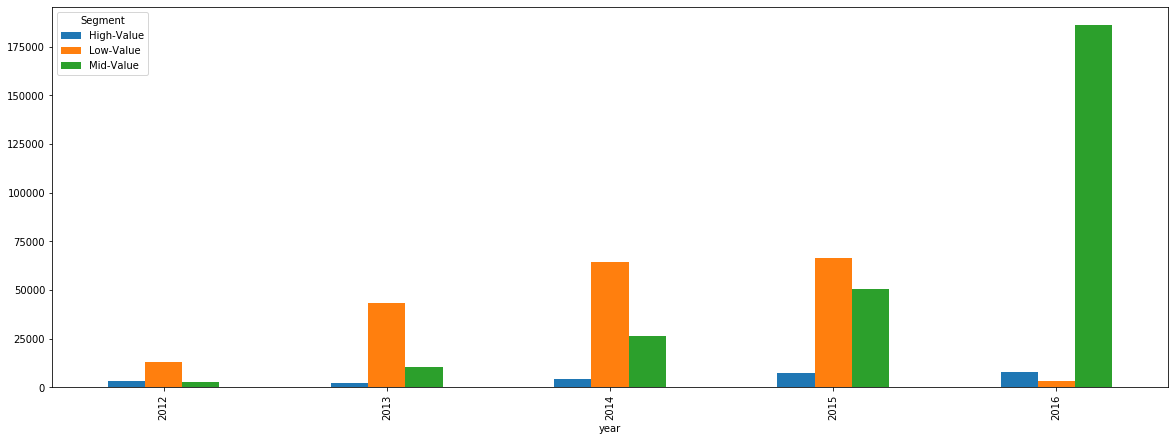

In [199]:
yseg = fifi.groupby(['year','Segment']).size().unstack()
yseg.plot(kind='bar',stacked=False,figsize=(20,7))

# Which marketing source is responsible in bringing which type of customer?

In [200]:
fififi = pd.merge(ficust, fi_user, on='Customer No.')

In [201]:
fififi.head()

,Unnamed: 0,Area / Locality,CITY,Cash /Cashless Type,Claim No.,Cust Type,Customer No.,District,Expiry Date,Gate Pass Date,Gate Pass Time,Insurance Company,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,ODN No.,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Policy no.,Print Status,Recovrbl Exp,Regn No,Technician Name,Total Amt Wtd Tax._x,Total Value,User ID,Days,InvoiceYearMonth,MinPurchaseDate,MinPurchaseYearMonth,UserType,MinServiceDate,MinServiceYearMonth,PlantType,Business Partner,Partner Type,Data Origin,Title,Marital Status,Occupation,Date of Birth,Death date,Recency,RecencyCluster,Frequency,FrequencyCluster,Total Amt Wtd Tax._y,RevenueCluster,OverallScore,Segment,avg_serviving_cost,profit_margin,CLV,cust_lifetime_value
0,0,MAJIWADA,THANE,NaN,NaN,Retail,67849,Maharashtra,NaN,NaN,00:00:00,NaN,2015-01-02,7005200002,11:30:36,168303,2014-12-13,14:29:43,49317,1203.14,GENERAL MOTORS,0.0,SPARK,7.005200e+09,500.06,Paid Service,2348.75,400601,BC01,THANE,NaN,NO,0.0,KA19MA1291,RUPESH,4051.95,4051.95,BC01FS1,20,201501,2014-08-14,201408,Existing,2012-04-02,201204,Existing,71941,Retail,Used Car Dealer,Mr.,NaN,NaN,NaN,NaT,668,2,5,1,74525.25,1,4,Mid-Value,14905.05,3726.2625,46343.967523,1.726898e+08
1,619842,MAJIWADA,THANE,CASHLESS,MOT03977311,Retail,67849,Maharashtra,NaN,NaN,00:00:00,NaN,2014-08-14,7000137359,17:54:30,136482,2014-08-08,15:26:53,45575,989.98,GENERAL MOTORS,0.0,SPARK,7.000137e+09,6249.87,Accidental,4230.25,400601,BC01,THANE,NaN,NO,0.0,KA19MA1291,AMARNATH,11470.10,11470.10,BC01FS1,6,201408,2014-08-14,201408,New,2012-04-02,201204,Existing,71941,Retail,Used Car Dealer,Mr.,NaN,NaN,NaN,NaT,668,2,5,1,74525.25,1,4,Mid-Value,14905.05,3726.2625,46343.967523,1.726898e+08
2,619970,MAJIWADA,THANE,NaN,NaN,Retail,67849,Maharashtra,NaN,NaN,00:00:00,NaN,2014-08-16,7000137489,10:52:30,135895,2014-08-06,12:49:48,45575,6473.05,GENERAL MOTORS,0.0,SPARK,7.000137e+09,7325.09,Paid Service,14546.14,400601,BC01,THANE,NaN,NO,0.0,KA19MA1291,RUPESH,28344.28,28344.28,BC01FS1,10,201408,2014-08-14,201408,New,2012-04-02,201204,Existing,71941,Retail,Used Car Dealer,Mr.,NaN,NaN,NaN,NaT,668,2,5,1,74525.25,1,4,Mid-Value,14905.05,3726.2625,46343.967523,1.726898e+08
3,632962,MAJIWADA,THANE,NaN,NaN,Retail,67849,Maharashtra,NaN,NaN,00:00:00,NaN,2014-10-09,7000151113,17:35:30,150383,2014-10-06,11:40:52,47556,0.00,GENERAL MOTORS,0.0,SPARK,7.000151e+09,0.00,Running Repairs,200.00,400601,BC01,THANE,NaN,NO,0.0,KA19MA1291,HARSHAD,200.00,200.00,BC01SA1,3,201410,2014-08-14,201408,Existing,2012-04-02,201204,Existing,71941,Retail,Used Car Dealer,Mr.,NaN,NaN,NaN,NaT,668,2,5,1,74525.25,1,4,Mid-Value,14905.05,3726.2625,46343.967523,1.726898e+08
4,655371,MAJIWADA,THANE,CASHLESS,MOTO4249094,Retail,67849,Maharashtra,NaN,NaN,00:00:00,NaN,2014-12-31,7000175211,18:41:00,168210,2014-12-13,12:14:37,49317,1760.02,GENERAL MOTORS,500.0,SPARK,7.000175e+09,7850.09,Accidental,20348.81,400601,BC01,THANE,NaN,NO,0.0,KA19MA1291,AMARNATH,30458.92,30458.92,BC01FS1,18,201412,2014-08-14,201408,Existing,2012-04-02,201204,Existing,71941,Retail,Used Car Dealer,Mr.,NaN,NaN,NaN,NaT,668,2,5,1,74525.25,1,4,Mid-Value,14905.05,3726.2625,46343.967523,1.726898e+08


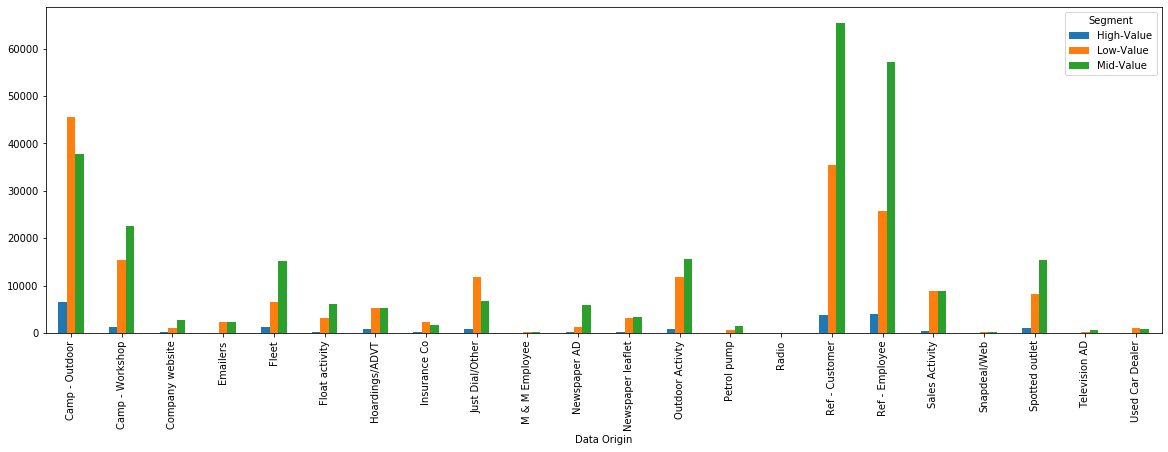

In [202]:
doseg = fififi.groupby(['Data Origin','Segment']).size().unstack()
doseg.plot(kind='bar',stacked=False,figsize=(20,6))

# Which make/car is popular among a group/segment?

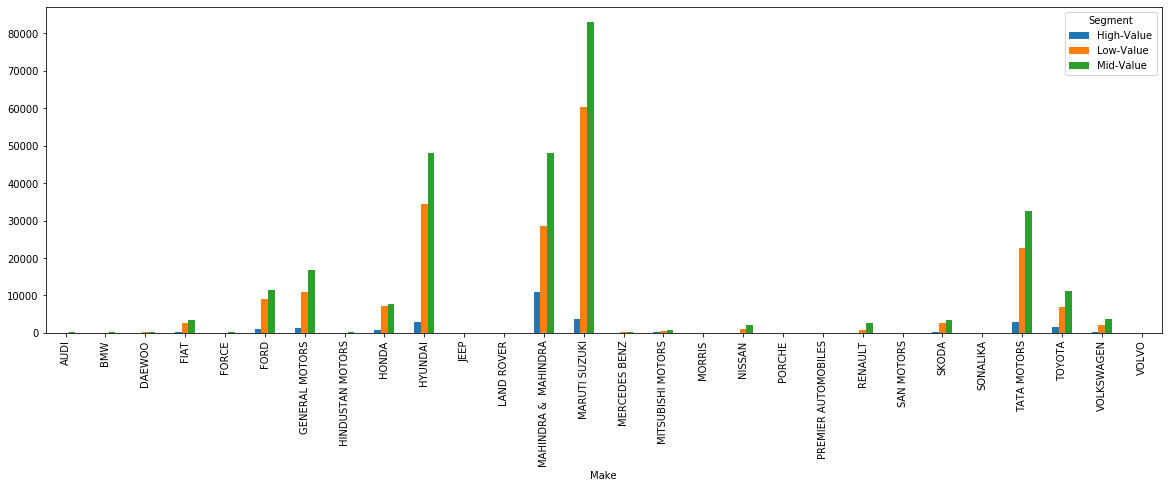

In [203]:
mkseg = fifi.groupby(['Make','Segment']).size().unstack()
mkseg.plot(kind='bar',stacked=False,figsize=(20,6))

# What services will a particular group opt for?

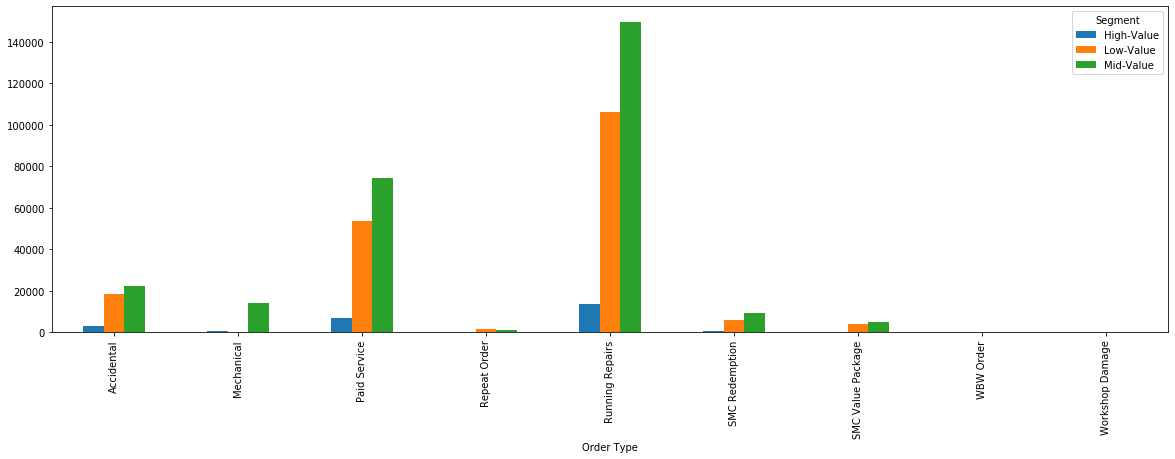

In [204]:
otseg = fifi.groupby(['Order Type','Segment']).size().unstack()
otseg.plot(kind='bar',stacked=False,figsize=(20,6))

# Based on customer segments, we can predict how much revenue can be generated from a group.

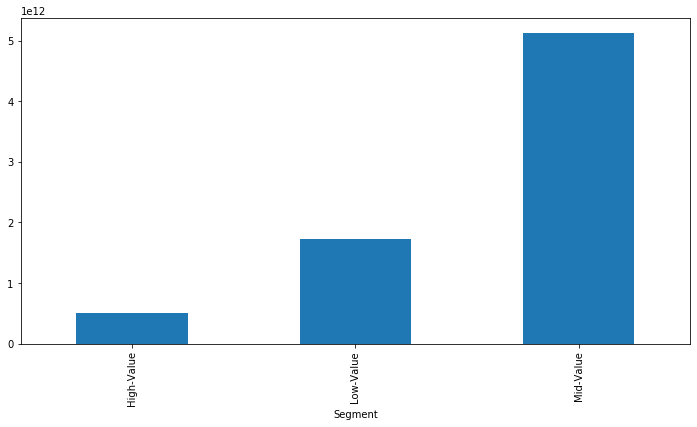

In [205]:
fig=plt.figure(figsize=(12,6))
fi_user.groupby('Segment')['cust_lifetime_value'].sum().plot(kind = 'bar')

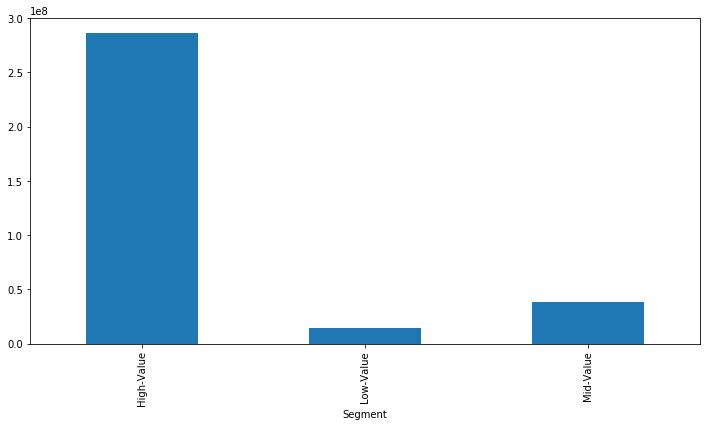

In [206]:
fig=plt.figure(figsize=(12,6))
fi_user.groupby('Segment')['cust_lifetime_value'].mean().plot(kind = 'bar')

# Prediction Model for CLTV


In [207]:
fi.head()

,Unnamed: 0,Area / Locality,CITY,Cash /Cashless Type,Claim No.,Cust Type,Customer No.,District,Expiry Date,Gate Pass Date,Gate Pass Time,Insurance Company,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,ODN No.,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Policy no.,Print Status,Recovrbl Exp,Regn No,Technician Name,Total Amt Wtd Tax.,Total Value,User ID,Days,InvoiceYearMonth,MinPurchaseDate,MinPurchaseYearMonth,UserType,MinServiceDate,MinServiceYearMonth,PlantType,year,month,day
0,0,MAJIWADA,THANE,NaN,NaN,Retail,67849,Maharashtra,NaN,NaN,00:00:00,NaN,2015-01-02,7005200002,11:30:36,168303,2014-12-13,14:29:43,49317,1203.14,GENERAL MOTORS,0.0,SPARK,7.005200e+09,500.06,Paid Service,2348.75,400601,BC01,THANE,NaN,NO,0.0,KA19MA1291,RUPESH,4051.95,4051.95,BC01FS1,20,201501,2014-08-14,201408,Existing,2012-04-02,201204,Existing,2015,1,2
1,619842,MAJIWADA,THANE,CASHLESS,MOT03977311,Retail,67849,Maharashtra,NaN,NaN,00:00:00,NaN,2014-08-14,7000137359,17:54:30,136482,2014-08-08,15:26:53,45575,989.98,GENERAL MOTORS,0.0,SPARK,7.000137e+09,6249.87,Accidental,4230.25,400601,BC01,THANE,NaN,NO,0.0,KA19MA1291,AMARNATH,11470.10,11470.10,BC01FS1,6,201408,2014-08-14,201408,New,2012-04-02,201204,Existing,2014,8,14
2,619970,MAJIWADA,THANE,NaN,NaN,Retail,67849,Maharashtra,NaN,NaN,00:00:00,NaN,2014-08-16,7000137489,10:52:30,135895,2014-08-06,12:49:48,45575,6473.05,GENERAL MOTORS,0.0,SPARK,7.000137e+09,7325.09,Paid Service,14546.14,400601,BC01,THANE,NaN,NO,0.0,KA19MA1291,RUPESH,28344.28,28344.28,BC01FS1,10,201408,2014-08-14,201408,New,2012-04-02,201204,Existing,2014,8,16
3,632962,MAJIWADA,THANE,NaN,NaN,Retail,67849,Maharashtra,NaN,NaN,00:00:00,NaN,2014-10-09,7000151113,17:35:30,150383,2014-10-06,11:40:52,47556,0.00,GENERAL MOTORS,0.0,SPARK,7.000151e+09,0.00,Running Repairs,200.00,400601,BC01,THANE,NaN,NO,0.0,KA19MA1291,HARSHAD,200.00,200.00,BC01SA1,3,201410,2014-08-14,201408,Existing,2012-04-02,201204,Existing,2014,10,9
4,655371,MAJIWADA,THANE,CASHLESS,MOTO4249094,Retail,67849,Maharashtra,NaN,NaN,00:00:00,NaN,2014-12-31,7000175211,18:41:00,168210,2014-12-13,12:14:37,49317,1760.02,GENERAL MOTORS,500.0,SPARK,7.000175e+09,7850.09,Accidental,20348.81,400601,BC01,THANE,NaN,NO,0.0,KA19MA1291,AMARNATH,30458.92,30458.92,BC01FS1,18,201412,2014-08-14,201408,Existing,2012-04-02,201204,Existing,2014,12,31


In [208]:
fi['month_yr'] = fi['Invoice Date'].apply(lambda x: x.strftime('%b-%Y'))

In [209]:
fi.head()

,Unnamed: 0,Area / Locality,CITY,Cash /Cashless Type,Claim No.,Cust Type,Customer No.,District,Expiry Date,Gate Pass Date,Gate Pass Time,Insurance Company,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,ODN No.,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Policy no.,Print Status,Recovrbl Exp,Regn No,Technician Name,Total Amt Wtd Tax.,Total Value,User ID,Days,InvoiceYearMonth,MinPurchaseDate,MinPurchaseYearMonth,UserType,MinServiceDate,MinServiceYearMonth,PlantType,year,month,day,month_yr
0,0,MAJIWADA,THANE,NaN,NaN,Retail,67849,Maharashtra,NaN,NaN,00:00:00,NaN,2015-01-02,7005200002,11:30:36,168303,2014-12-13,14:29:43,49317,1203.14,GENERAL MOTORS,0.0,SPARK,7.005200e+09,500.06,Paid Service,2348.75,400601,BC01,THANE,NaN,NO,0.0,KA19MA1291,RUPESH,4051.95,4051.95,BC01FS1,20,201501,2014-08-14,201408,Existing,2012-04-02,201204,Existing,2015,1,2,Jan-2015
1,619842,MAJIWADA,THANE,CASHLESS,MOT03977311,Retail,67849,Maharashtra,NaN,NaN,00:00:00,NaN,2014-08-14,7000137359,17:54:30,136482,2014-08-08,15:26:53,45575,989.98,GENERAL MOTORS,0.0,SPARK,7.000137e+09,6249.87,Accidental,4230.25,400601,BC01,THANE,NaN,NO,0.0,KA19MA1291,AMARNATH,11470.10,11470.10,BC01FS1,6,201408,2014-08-14,201408,New,2012-04-02,201204,Existing,2014,8,14,Aug-2014
2,619970,MAJIWADA,THANE,NaN,NaN,Retail,67849,Maharashtra,NaN,NaN,00:00:00,NaN,2014-08-16,7000137489,10:52:30,135895,2014-08-06,12:49:48,45575,6473.05,GENERAL MOTORS,0.0,SPARK,7.000137e+09,7325.09,Paid Service,14546.14,400601,BC01,THANE,NaN,NO,0.0,KA19MA1291,RUPESH,28344.28,28344.28,BC01FS1,10,201408,2014-08-14,201408,New,2012-04-02,201204,Existing,2014,8,16,Aug-2014
3,632962,MAJIWADA,THANE,NaN,NaN,Retail,67849,Maharashtra,NaN,NaN,00:00:00,NaN,2014-10-09,7000151113,17:35:30,150383,2014-10-06,11:40:52,47556,0.00,GENERAL MOTORS,0.0,SPARK,7.000151e+09,0.00,Running Repairs,200.00,400601,BC01,THANE,NaN,NO,0.0,KA19MA1291,HARSHAD,200.00,200.00,BC01SA1,3,201410,2014-08-14,201408,Existing,2012-04-02,201204,Existing,2014,10,9,Oct-2014
4,655371,MAJIWADA,THANE,CASHLESS,MOTO4249094,Retail,67849,Maharashtra,NaN,NaN,00:00:00,NaN,2014-12-31,7000175211,18:41:00,168210,2014-12-13,12:14:37,49317,1760.02,GENERAL MOTORS,500.0,SPARK,7.000175e+09,7850.09,Accidental,20348.81,400601,BC01,THANE,NaN,NO,0.0,KA19MA1291,AMARNATH,30458.92,30458.92,BC01FS1,18,201412,2014-08-14,201408,Existing,2012-04-02,201204,Existing,2014,12,31,Dec-2014


In [210]:
sale=fi.pivot_table(index=['Customer No.'],columns=['month_yr'],values='Total Amt Wtd Tax.',aggfunc='sum',fill_value=0).reset_index()

In [211]:
sale.head()

month_yr,Customer No.,Apr-2012,Apr-2013,Apr-2014,Apr-2015,Apr-2016,Aug-2012,Aug-2013,Aug-2014,Aug-2015,Aug-2016,Dec-2012,Dec-2013,Dec-2014,Dec-2015,Feb-2013,Feb-2014,Feb-2015,Feb-2016,Jan-2013,Jan-2014,Jan-2015,Jan-2016,Jul-2012,Jul-2013,Jul-2014,Jul-2015,Jul-2016,Jun-2012,Jun-2013,Jun-2014,Jun-2015,Jun-2016,Mar-2013,Mar-2014,Mar-2015,Mar-2016,May-2012,May-2013,May-2014,May-2015,May-2016,Nov-2012,Nov-2013,Nov-2014,Nov-2015,Oct-2012,Oct-2013,Oct-2014,Oct-2015,Oct-2016,Sep-2012,Sep-2013,Sep-2014,Sep-2015,Sep-2016
0,1,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0
1,10,3779.80,0.0,0.0,0.0,0.0,1782.25,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,2041.9,0.0,0.0,0.0,599.84,0.0,0.00,0.0,0.0,0.0,2901.77,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0
2,100,14167.07,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,6632.67,0.0,0.0,0.0,0.0
3,1000,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,2818.86,0.0,0.0,0.0,0.00,0.0,0.0,0.0,1980.84,0.0,0.0,0.0,2094.09,0.0,0.0,0.0,0.0,0.0,749.42,0.0,0.0,723.48,0.00,446.75,0.0,0.0,0.00,0.0,0.0,0.0,0.0
4,10000,0.00,0.0,0.0,0.0,0.0,0.00,0.0,1001.29,185.96,0.0,0.0,249.22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,299.05,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0


In [212]:
sale.head()

month_yr,Customer No.,Apr-2012,Apr-2013,Apr-2014,Apr-2015,Apr-2016,Aug-2012,Aug-2013,Aug-2014,Aug-2015,Aug-2016,Dec-2012,Dec-2013,Dec-2014,Dec-2015,Feb-2013,Feb-2014,Feb-2015,Feb-2016,Jan-2013,Jan-2014,Jan-2015,Jan-2016,Jul-2012,Jul-2013,Jul-2014,Jul-2015,Jul-2016,Jun-2012,Jun-2013,Jun-2014,Jun-2015,Jun-2016,Mar-2013,Mar-2014,Mar-2015,Mar-2016,May-2012,May-2013,May-2014,May-2015,May-2016,Nov-2012,Nov-2013,Nov-2014,Nov-2015,Oct-2012,Oct-2013,Oct-2014,Oct-2015,Oct-2016,Sep-2012,Sep-2013,Sep-2014,Sep-2015,Sep-2016
0,1,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0
1,10,3779.80,0.0,0.0,0.0,0.0,1782.25,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,2041.9,0.0,0.0,0.0,599.84,0.0,0.00,0.0,0.0,0.0,2901.77,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0
2,100,14167.07,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,6632.67,0.0,0.0,0.0,0.0
3,1000,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,2818.86,0.0,0.0,0.0,0.00,0.0,0.0,0.0,1980.84,0.0,0.0,0.0,2094.09,0.0,0.0,0.0,0.0,0.0,749.42,0.0,0.0,723.48,0.00,446.75,0.0,0.0,0.00,0.0,0.0,0.0,0.0
4,10000,0.00,0.0,0.0,0.0,0.0,0.00,0.0,1001.29,185.96,0.0,0.0,249.22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,299.05,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0


In [213]:
column_list = list(sale)

In [214]:
column_list

['Customer No.',
 'Apr-2012',
 'Apr-2013',
 'Apr-2014',
 'Apr-2015',
 'Apr-2016',
 'Aug-2012',
 'Aug-2013',
 'Aug-2014',
 'Aug-2015',
 'Aug-2016',
 'Dec-2012',
 'Dec-2013',
 'Dec-2014',
 'Dec-2015',
 'Feb-2013',
 'Feb-2014',
 'Feb-2015',
 'Feb-2016',
 'Jan-2013',
 'Jan-2014',
 'Jan-2015',
 'Jan-2016',
 'Jul-2012',
 'Jul-2013',
 'Jul-2014',
 'Jul-2015',
 'Jul-2016',
 'Jun-2012',
 'Jun-2013',
 'Jun-2014',
 'Jun-2015',
 'Jun-2016',
 'Mar-2013',
 'Mar-2014',
 'Mar-2015',
 'Mar-2016',
 'May-2012',
 'May-2013',
 'May-2014',
 'May-2015',
 'May-2016',
 'Nov-2012',
 'Nov-2013',
 'Nov-2014',
 'Nov-2015',
 'Oct-2012',
 'Oct-2013',
 'Oct-2014',
 'Oct-2015',
 'Oct-2016',
 'Sep-2012',
 'Sep-2013',
 'Sep-2014',
 'Sep-2015',
 'Sep-2016']

In [215]:
column_list.remove("Customer No.")

In [216]:
column_list

['Apr-2012',
 'Apr-2013',
 'Apr-2014',
 'Apr-2015',
 'Apr-2016',
 'Aug-2012',
 'Aug-2013',
 'Aug-2014',
 'Aug-2015',
 'Aug-2016',
 'Dec-2012',
 'Dec-2013',
 'Dec-2014',
 'Dec-2015',
 'Feb-2013',
 'Feb-2014',
 'Feb-2015',
 'Feb-2016',
 'Jan-2013',
 'Jan-2014',
 'Jan-2015',
 'Jan-2016',
 'Jul-2012',
 'Jul-2013',
 'Jul-2014',
 'Jul-2015',
 'Jul-2016',
 'Jun-2012',
 'Jun-2013',
 'Jun-2014',
 'Jun-2015',
 'Jun-2016',
 'Mar-2013',
 'Mar-2014',
 'Mar-2015',
 'Mar-2016',
 'May-2012',
 'May-2013',
 'May-2014',
 'May-2015',
 'May-2016',
 'Nov-2012',
 'Nov-2013',
 'Nov-2014',
 'Nov-2015',
 'Oct-2012',
 'Oct-2013',
 'Oct-2014',
 'Oct-2015',
 'Oct-2016',
 'Sep-2012',
 'Sep-2013',
 'Sep-2014',
 'Sep-2015',
 'Sep-2016']

In [217]:
sale["CLV"] = sale[column_list].sum(axis=1)

In [218]:
sale.head()

month_yr,Customer No.,Apr-2012,Apr-2013,Apr-2014,Apr-2015,Apr-2016,Aug-2012,Aug-2013,Aug-2014,Aug-2015,Aug-2016,Dec-2012,Dec-2013,Dec-2014,Dec-2015,Feb-2013,Feb-2014,Feb-2015,Feb-2016,Jan-2013,Jan-2014,Jan-2015,Jan-2016,Jul-2012,Jul-2013,Jul-2014,Jul-2015,Jul-2016,Jun-2012,Jun-2013,Jun-2014,Jun-2015,Jun-2016,Mar-2013,Mar-2014,Mar-2015,Mar-2016,May-2012,May-2013,May-2014,May-2015,May-2016,Nov-2012,Nov-2013,Nov-2014,Nov-2015,Oct-2012,Oct-2013,Oct-2014,Oct-2015,Oct-2016,Sep-2012,Sep-2013,Sep-2014,Sep-2015,Sep-2016,CLV
0,1,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00
1,10,3779.80,0.0,0.0,0.0,0.0,1782.25,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,2041.9,0.0,0.0,0.0,599.84,0.0,0.00,0.0,0.0,0.0,2901.77,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,11105.56
2,100,14167.07,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,6632.67,0.0,0.0,0.0,0.0,20799.74
3,1000,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,2818.86,0.0,0.0,0.0,0.00,0.0,0.0,0.0,1980.84,0.0,0.0,0.0,2094.09,0.0,0.0,0.0,0.0,0.0,749.42,0.0,0.0,723.48,0.00,446.75,0.0,0.0,0.00,0.0,0.0,0.0,0.0,8813.44
4,10000,0.00,0.0,0.0,0.0,0.0,0.00,0.0,1001.29,185.96,0.0,0.0,249.22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,299.05,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1735.52


In [219]:
x=sale[column_list]
y=sale['CLV']

In [220]:
!pip install sklearn

In [221]:
from sklearn.model_selection import train_test_split

In [222]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state=0)

In [223]:
from sklearn.linear_model import LinearRegression

In [224]:
linreg = LinearRegression()

linreg.fit(x_train, y_train)

y_pred = linreg.predict(x_test)

In [225]:
print(linreg.intercept_)
print(linreg.coef_)

-1.8189894035458565e-12
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1.]


In [226]:
from sklearn import metrics

In [227]:
print("R-Square:",metrics.r2_score(y_test, y_pred))

R-Square: 1.0


In [228]:
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print("MSE",metrics.mean_squared_error(y_test, y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 8.272558602667742e-11
MSE 2.6987560653283103e-19
RMSE: 5.194955308112198e-10
